# 2023A LAB cleanup

In [2]:
from astropy.io import fits
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tempfile
import imageio
from scipy import signal
from importlib import reload
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pylab as pl
# super special:
import sparkles.spark as spkl
import sparkles.spark_plots as sp
lab_dir = '/home/eden/data/2023A/LAB/'

## Checking the long lab split

In [2]:
# data - 
lab_long_20 = lab_dir + "lab_1800_long_spark_1Hz_amp020_sep20_real/camwfs/"
avg_dot_file = lab_long_20.replace('camwfs/', "data_chunks_list.npy")
avg_dot_long = np.vstack(np.load(avg_dot_file))

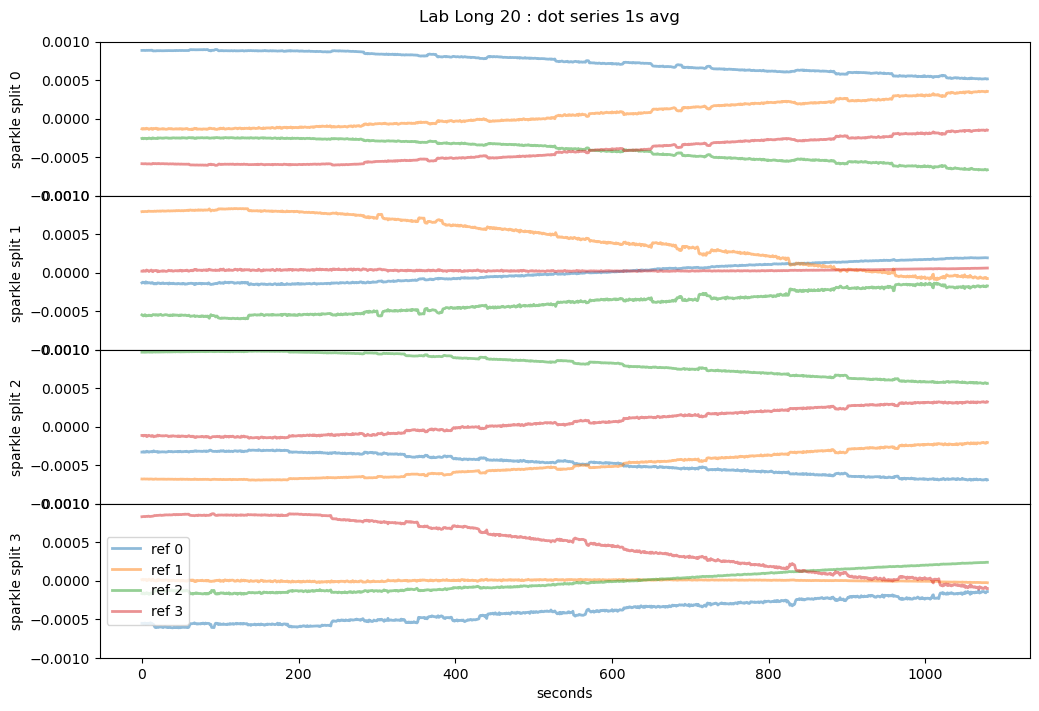

In [4]:
sp.plot_dotSeries_all("Lab Long 20sep ", avg_dot_long, min=-0.001, max=0.001)

In [4]:
# data - 
lab_long_22 = lab_dir + "lab_1800_long_spark_1Hz_amp020_sep22_ang20/camwfs/"
avg_dot_file = lab_long_22.replace('camwfs/', "data_chunks_list.npy")
avg_dot_long_22 = np.vstack(np.load(avg_dot_file))

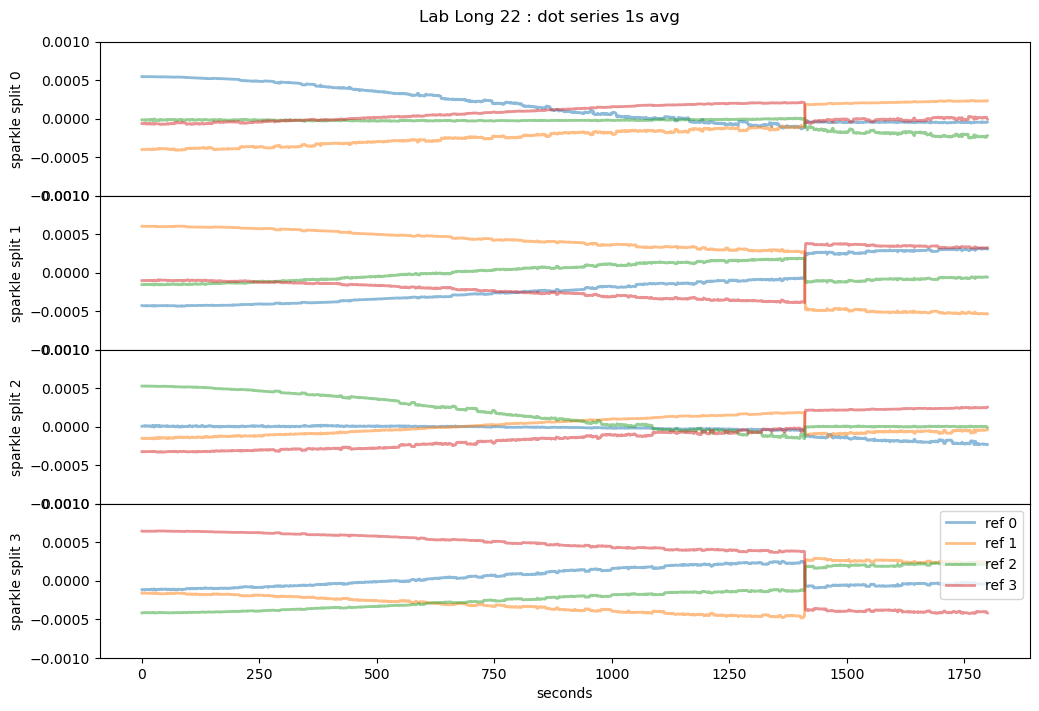

In [7]:
sp.plot_dotSeries_all("Lab Long 22sep, angle 20 ", avg_dot_long_22, min=-0.001, max=0.001)

## Lab file cleanup Procedure:

- Generate a lab flat to save as its own fits, steal file[0]'s fits header, four data slices long
- Save 1000 frames of the lab data
- save the full scale dot product

In [2]:
reload(spkl)

lab_test_dir = '/home/eden/data/2023A/LAB/lab_1800_sparkles_1Hz_amp020_sep20/camwfs/'
spkl.lab_archive(lab_test_dir)

/home/eden/data/2023A/LAB/lab_1800_sparkles_1Hz_amp020_sep20/camwfs/
/home/eden/data/2023A/LAB/lab_1800_sparkles_1Hz_amp020_sep20/lab_splits_total_list.npy  is already created, moving on.


In [3]:
# check the dot series:
lab_dotseries_f = lab_test_dir.replace("camwfs/", "lab_splits_total_list.npy")
dot_series = np.load(lab_dotseries_f)
dot_series.shape

(324000, 4)

In [4]:
# get sparkle parameters:
spark_params = spkl.get_spark_params(lab_test_dir)

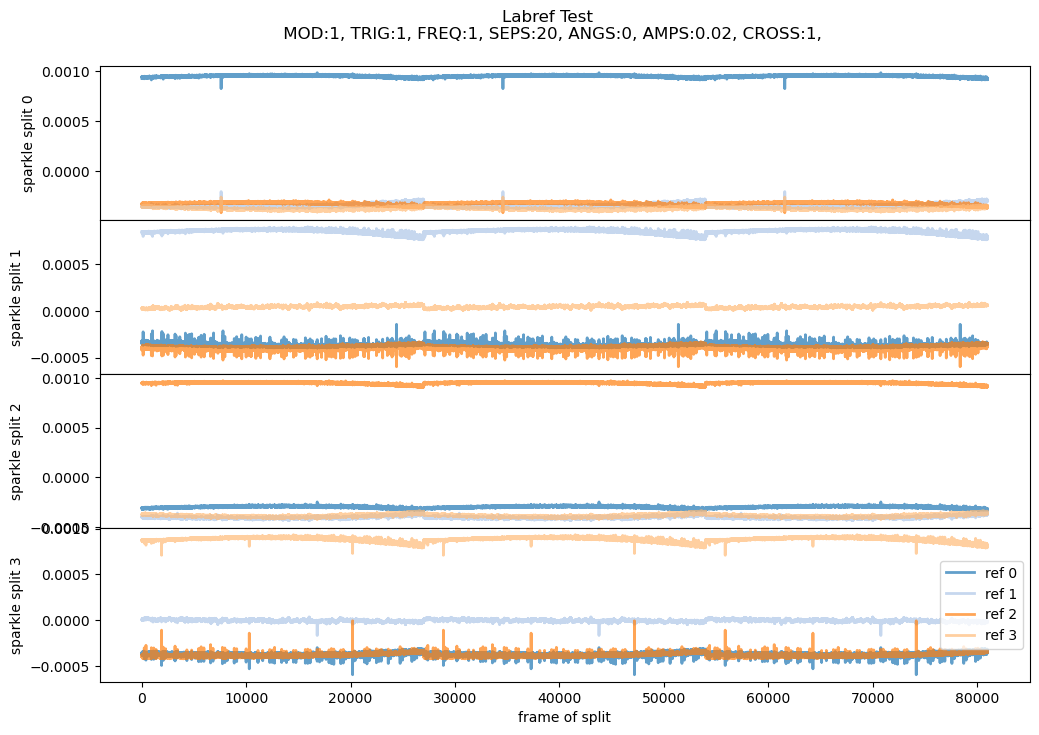

In [13]:
# Redid the ref code, now checking the series
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)

spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])
plt.suptitle(f"Labref Test \n {spark_param_print}", y=0.95)

colors = pl.cm.tab20(np.arange(4))

for e in range(4):
    for i in range(4):
        
        axs[e].plot(dot_series[e::4,i], lw=2, alpha = 0.7, label = f'ref {i}', c = colors[i])
    axs[e].set_ylabel(f"sparkle split {e}")
    #axs[e].set_ylim(top=.0002, bottom=-0.0002)

plt.legend()
plt.xlabel('frame of split')
plt.show()

In [23]:
# working on x-axis
reload(spkl)
hz = spkl.get_Hzs(lab_test_dir)

frame_n = dot_series.shape[0]/4
total_s = frame_n/hz
np.arange(0, total_s, total_s/frame_n)

HZ value: 1800


array([0.00000000e+00, 5.55555556e-04, 1.11111111e-03, ...,
       4.49983333e+01, 4.49988889e+01, 4.49994444e+01])

HZ value: 1800


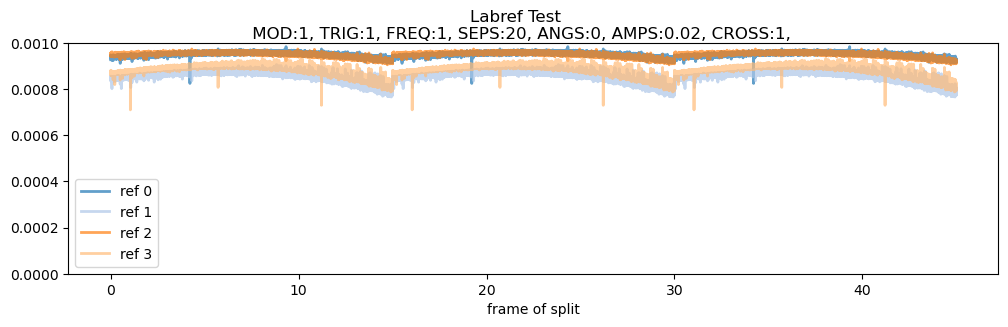

In [24]:
# Checking the diagonal of returning values
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,3), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)

spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])
plt.suptitle(f"Labref Test \n {spark_param_print}", y=0.99)

colors = pl.cm.tab20(np.arange(4))

#generating t axis 
hz = spkl.get_Hzs(lab_test_dir)
frame_n = dot_series.shape[0]/4
total_s = frame_n/hz
x_axis = np.arange(0, total_s, total_s/frame_n)

for e in range(4):
    axs.plot(x_axis, dot_series[e::4,e], lw=2, alpha = 0.7, label = f'ref {e}', c = colors[e])
    #axs.set_ylabel(f"sparkle split {e}")
    axs.set_ylim(bottom=0, top=0.001)

plt.legend()
plt.xlabel('seconds (s)')
plt.show()

In [5]:
# testing the saved labrefs:
lab_ref_fits = lab_test_dir.replace("camwfs/", "lab_ref.fits")
ref_data = fits.getdata(lab_ref_fits)

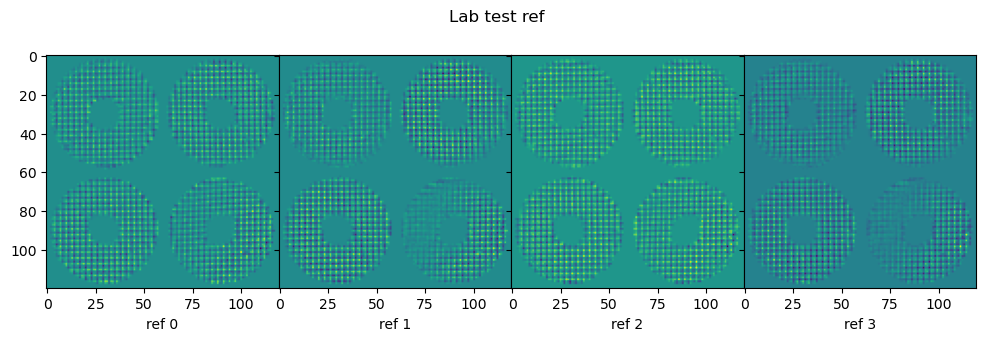

In [7]:
#sp_sky_0308.labref_norm.shape
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"Lab test ref", y=0.90)

for e in range(4):
    axs[e].imshow(ref_data[e], label = f'ref {e}')
    axs[e].set_xlabel(f"ref {e}")

plt.show()

In [14]:
fits.getheader(lab_ref_fits)['HIERARCH TWEETERSPECK SEPARATIONS']

20

## Comparing Lab values

In [12]:
amp_comp_files = ['lab_1800_sparkles_amp010_onoff_B', 'lab_1800_sparkles_1Hz_amp020_sep20', '03_05_lab_triggered']
ang_comp_files = ['lab_1800_spark_1Hz_amp020_sep22_angn10', 'lab_1800_spark_1Hz_amp020_sep22_angn20', 'lab_1800_spark_1Hz_amp020_sep22_angn45', 'lab_1800_spark_1Hz_amp020_sep22_angn60']
sep_comp_files = ['lab_1800_sparkles_1Hz_amp020_sep13', 'lab_1800_sparkles_1Hz_amp020_sep15', 'lab_1800_sparkles_1Hz_amp020_sep20', 'lab_1800_spark_1Hz_amp020_sep22']

### Comparing Amplitude

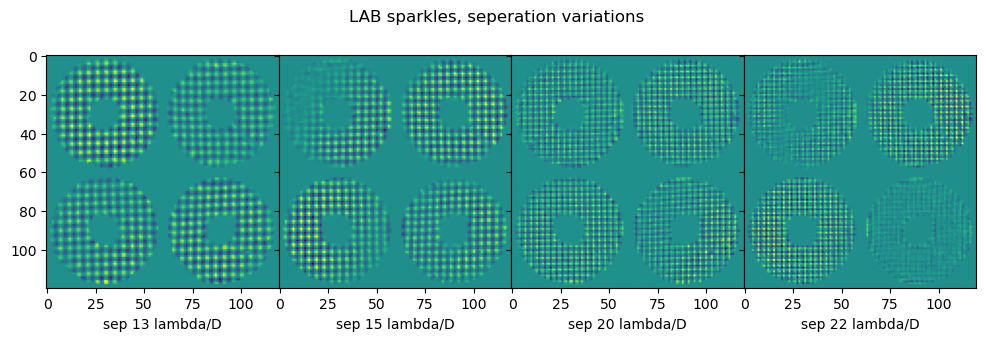

In [23]:
# Compare the different vals
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"LAB sparkles, seperation variations", y=0.90)

for e, r_file in enumerate(sep_comp_files):
    lab_test_dir = lab_dir +r_file + "/camwfs/"
    lab_ref_fits = lab_test_dir.replace("camwfs/", "lab_ref.fits")
    ref_data = fits.getdata(lab_ref_fits)

    spark_params = spkl.get_spark_params(lab_test_dir)

    axs[e].imshow(ref_data[0], vmax=0.03, vmin=-0.03 )
    axs[e].set_xlabel(f"sep {spark_params['SEPS']} lambda/D")

plt.show()

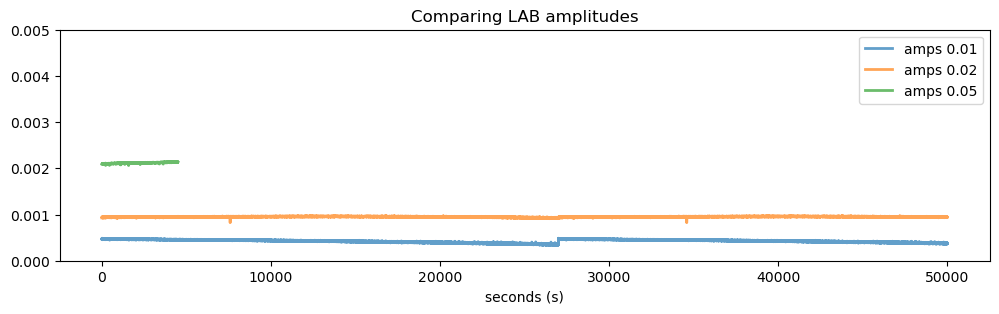

In [31]:
# checking single frame
colors = pl.cm.tab20(np.arange(4))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,3), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)
plt.title("Comparing LAB amplitudes")


for lab_file in amp_comp_files:
    lab_path = lab_dir + lab_file + "/camwfs/"

    # pull dot series
    lab_dotseries_f = lab_path.replace("camwfs/", "lab_splits_total_list.npy")
    dot_series = np.load(lab_dotseries_f)
    spark_params = spkl.get_spark_params(lab_path)
    #spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])

    axs.plot(dot_series[:200000:4,0], lw=2, alpha = 0.7, label = f"amps {spark_params['AMPS']}")
    #axs.set_ylabel(f"sparkle split {e}")
    axs.set_ylim(bottom=0, top=0.005)

plt.legend()
plt.xlabel('seconds (s)')
plt.show()
#plt.savefig("plts/labseries_single/"+lab_file+"dotseries.png", dpi=200)
plt.close()

## Iter look through all the lab

In [26]:
lab_dir = '/home/eden/data/2023A/LAB/'
lab_list = os.listdir(lab_dir)

In [27]:
lab_list

['03_05_lab_nottriggered',
 '03_05_lab_triggered',
 '03_05_lab_nottriggered copy',
 '03_11_lab_1800_sparkles_amp010_onoff',
 'lab_0600_sparkles_amp010_onoff',
 'lab_0600_sparkles_amp020_onoff',
 'lab_0600_sparkles_amp050_onoff',
 'lab_0900_sparkles_amp010_onoff',
 'lab_0900_sparkles_amp020_onoff',
 'lab_0900_sparkles_amp050_onoff',
 'lab_1200_sparkles_amp010_onoff',
 'lab_1200_sparkles_amp020_onoff',
 'lab_1200_sparkles_amp050_onoff',
 'lab_1800_sparkles_1Hz_amp016_sep15',
 'lab_1800_sparkles_1Hz_amp020_sep13',
 'lab_1800_sparkles_1Hz_amp020_sep15',
 'lab_1800_sparkles_1Hz_amp050_sep15',
 'lab_1800_sparkles_1Hz_amp020_sep20',
 '03_13_LAB_sparkle_frq_test_frq1',
 '03_13_LAB_sparkle_frq_test_frq1799',
 '03_13_LAB_sparkle_frq_test_frq2000',
 'lab_1800_spark_1Hz_amp020_sep22',
 'lab_1800_spark_1Hz_amp020_sep22_angn10',
 'lab_1800_spark_1Hz_amp020_sep22_angn20',
 'lab_1800_spark_1Hz_amp020_sep22_angn45',
 'lab_1800_spark_1Hz_amp020_sep22_angn60',
 'lab_1800_sparkles_amp010_onoff_A',
 'lab_1

HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 600
HZ value: 600
HZ value: 600
HZ value: 900
HZ value: 900
HZ value: 900
HZ value: 1200
HZ value: 1200
HZ value: 1200
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800


/tmp/ipykernel_37887/1472397494.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,3), facecolor='white', sharex=True)


HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800
HZ value: 1800


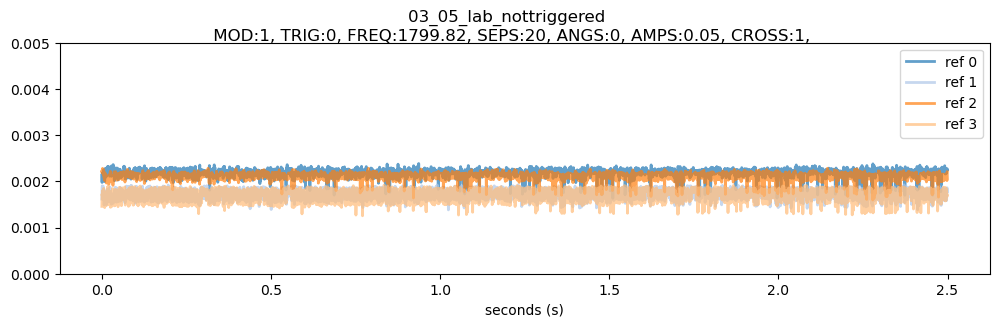

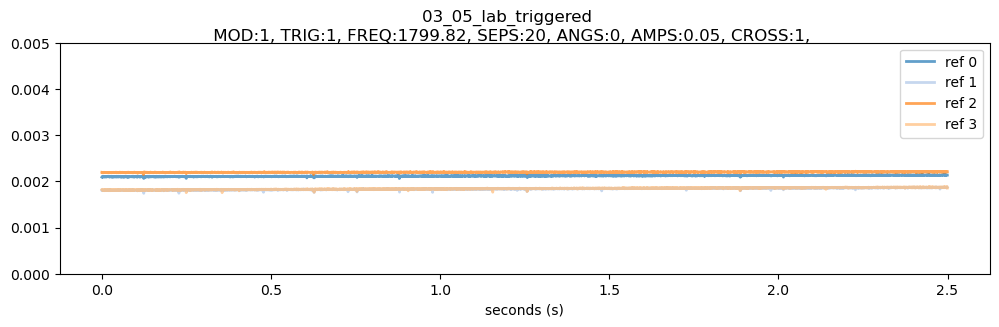

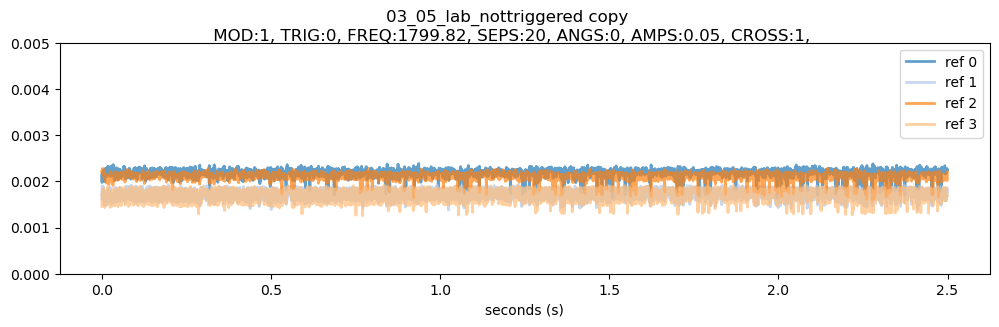

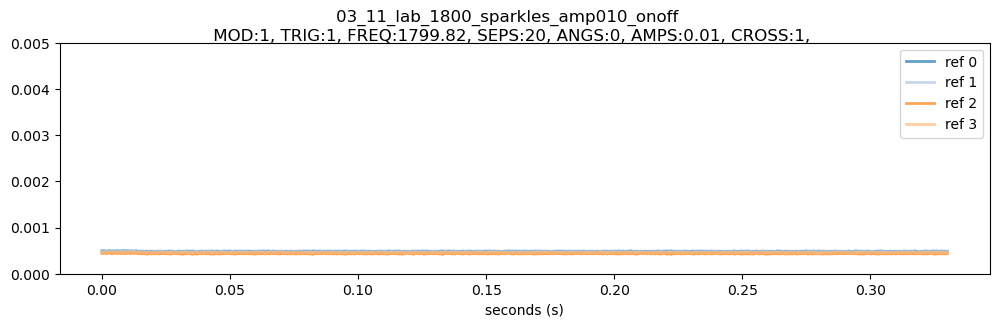

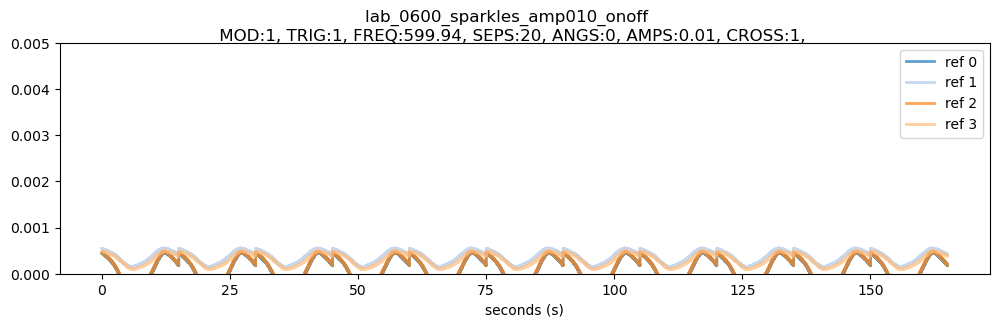

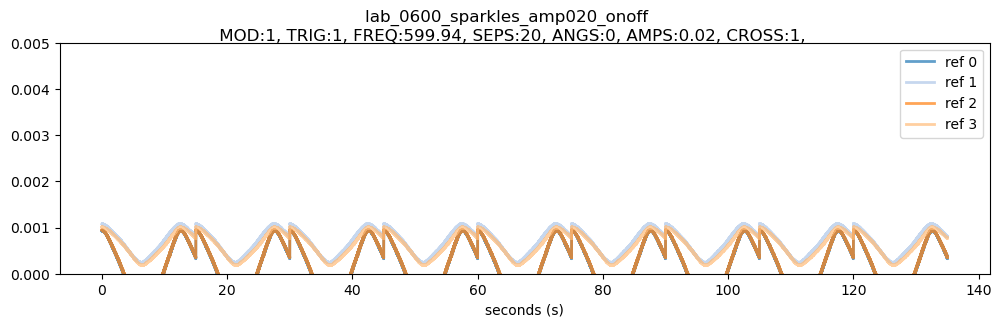

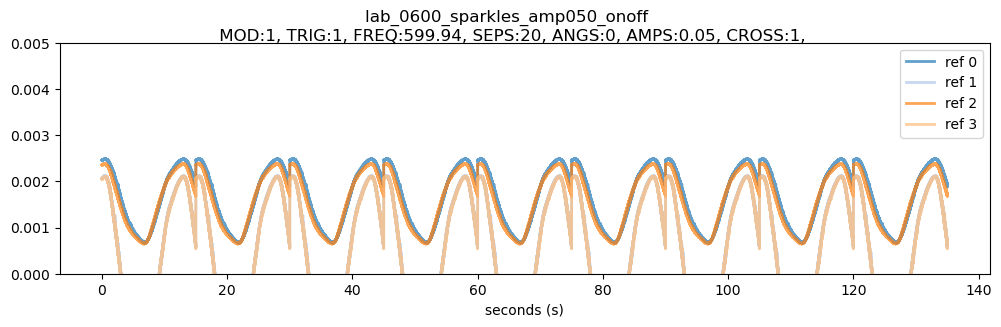

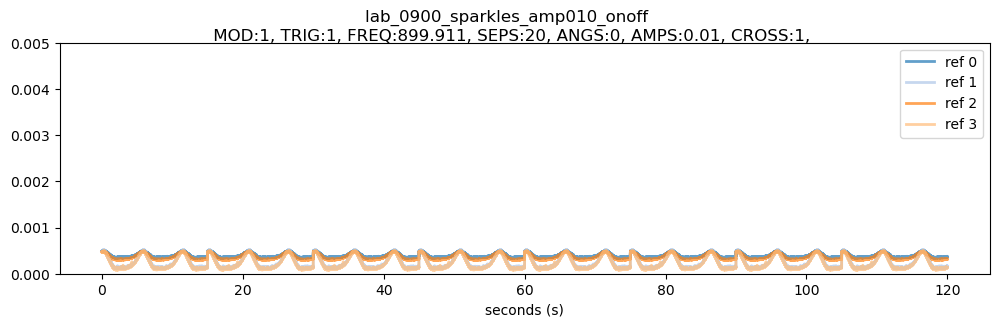

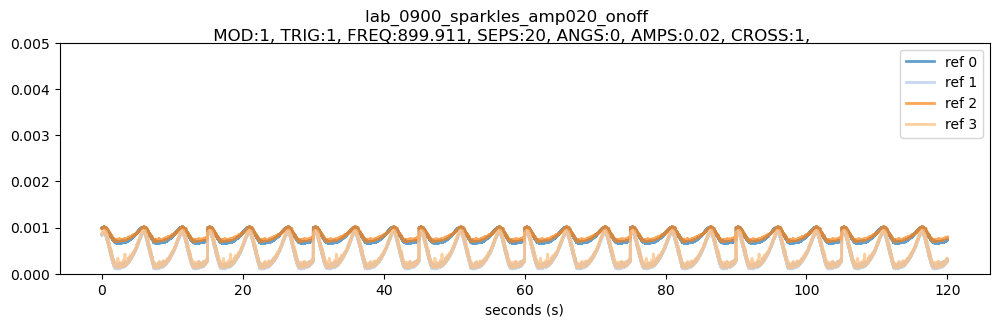

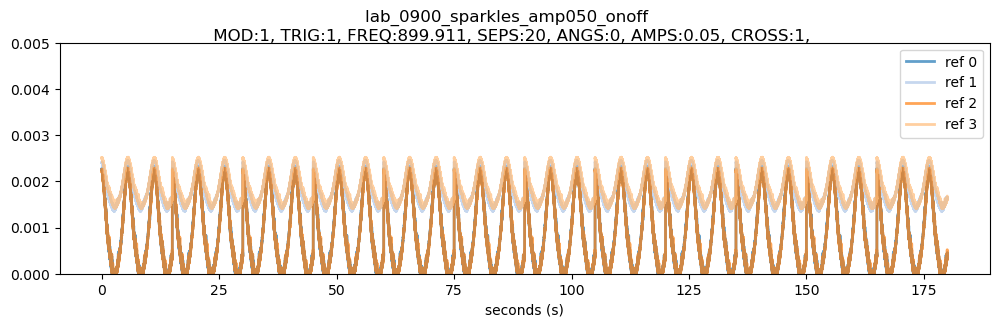

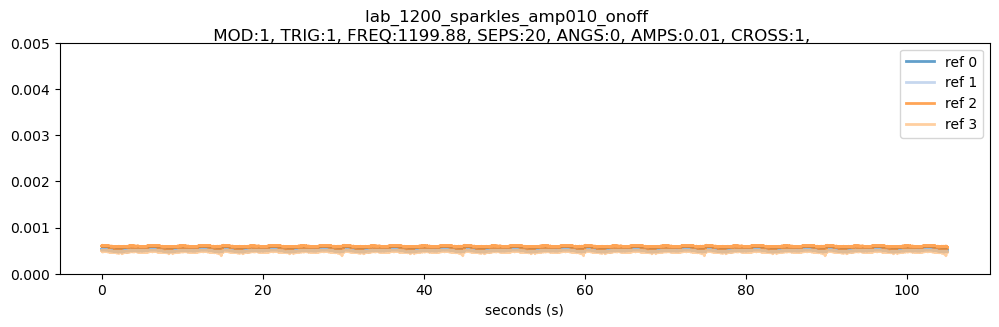

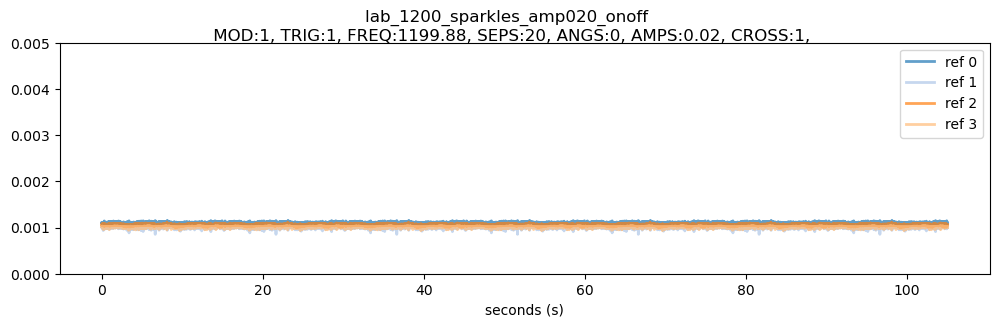

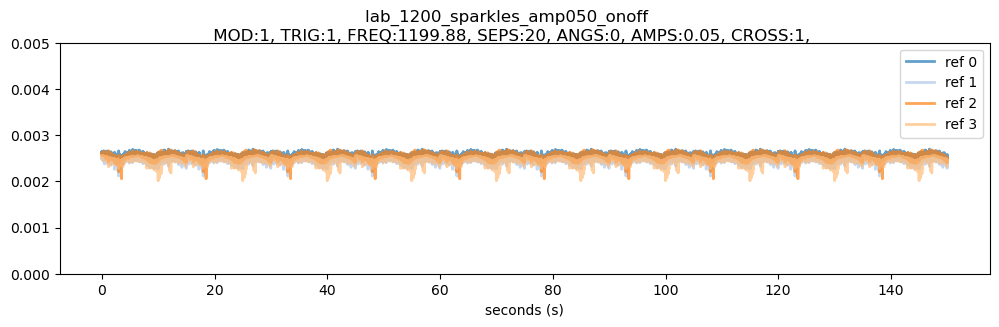

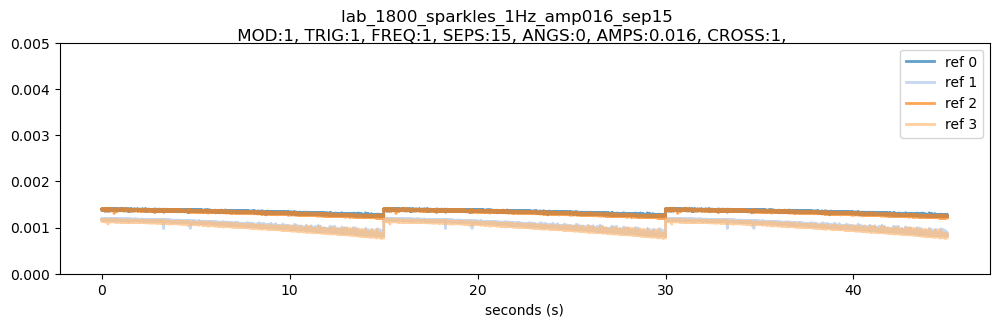

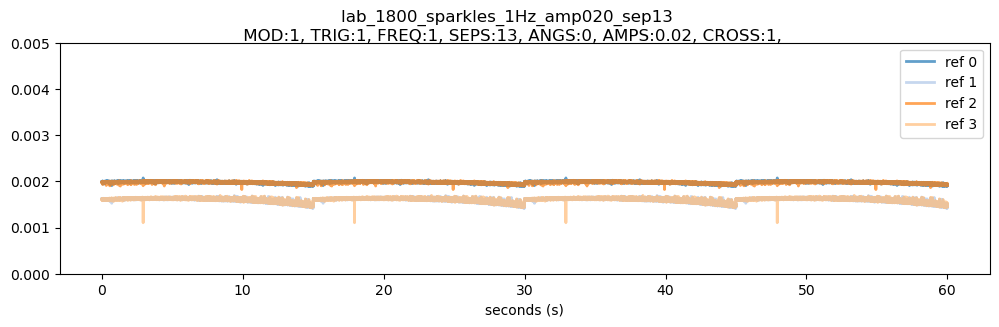

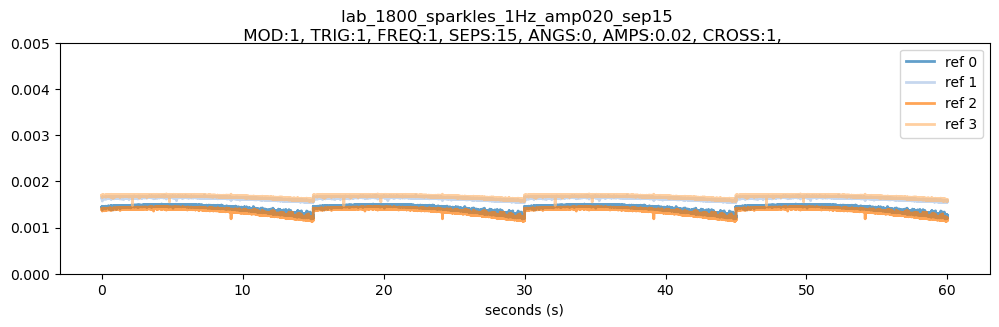

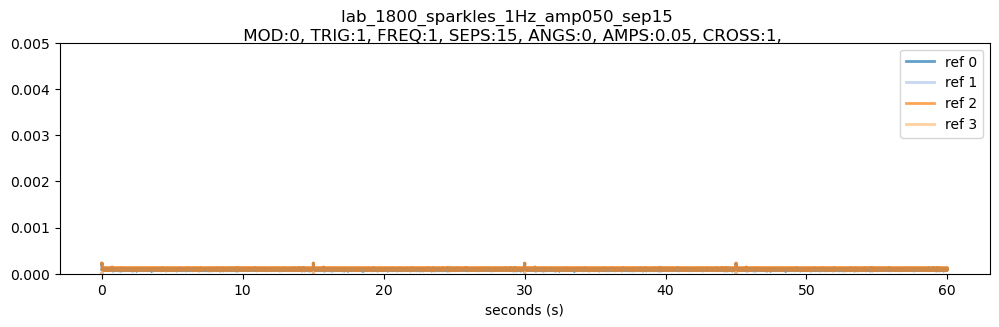

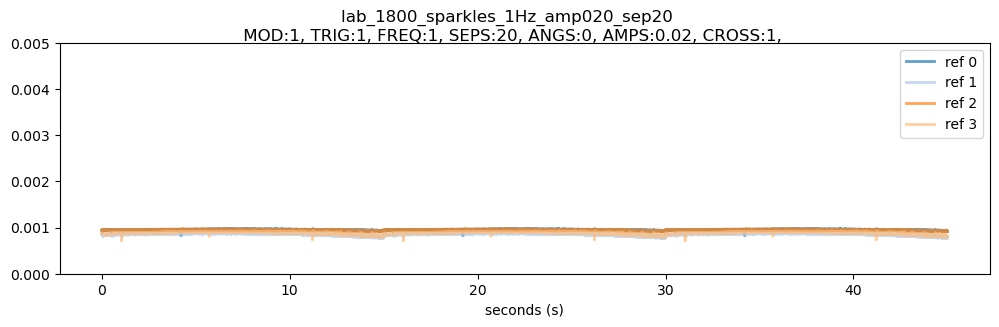

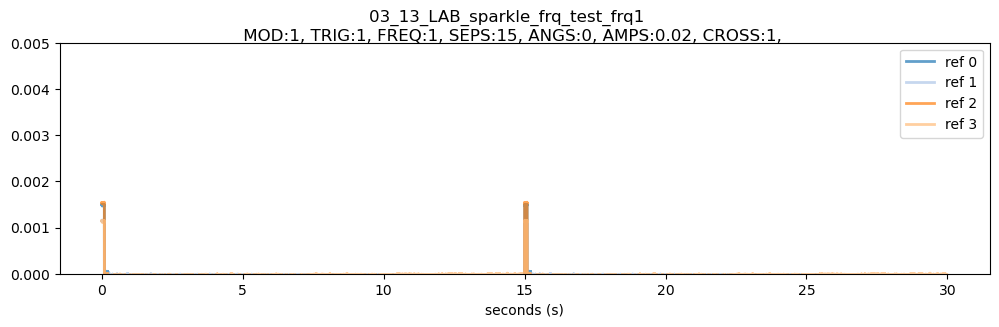

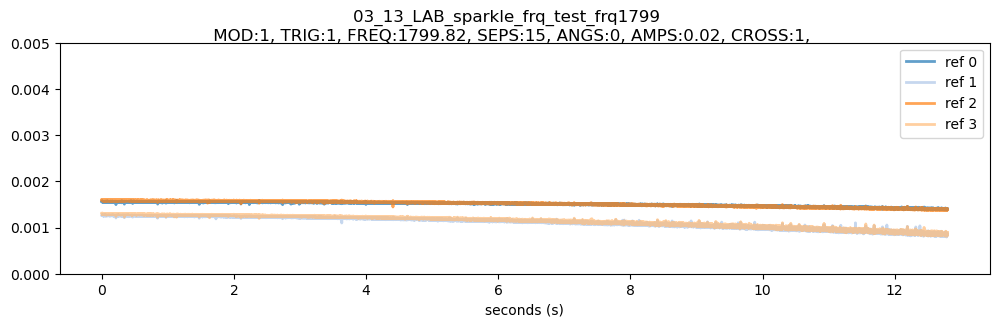

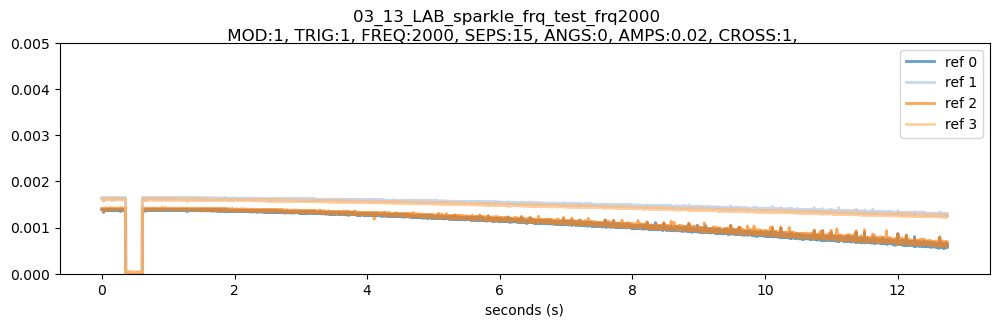

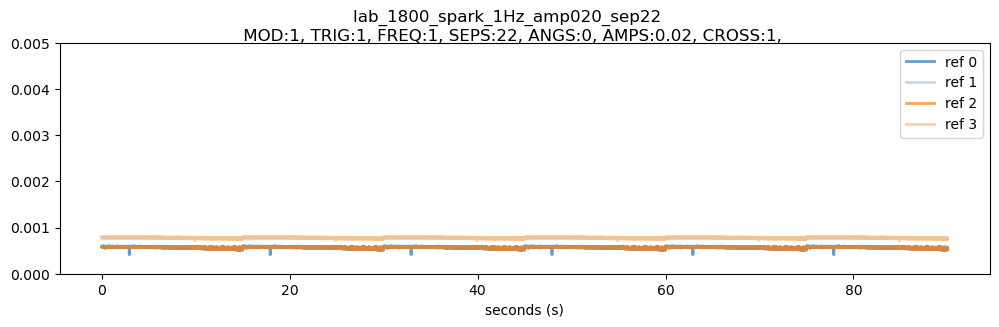

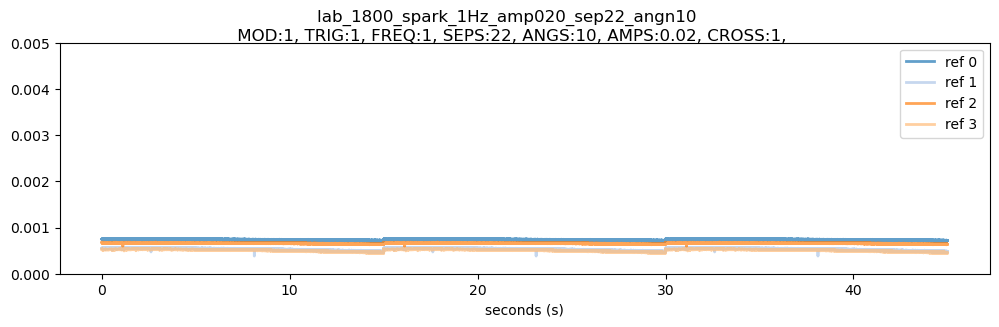

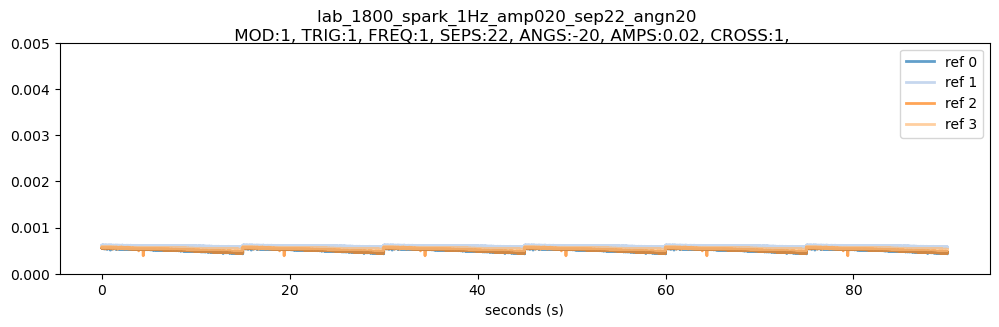

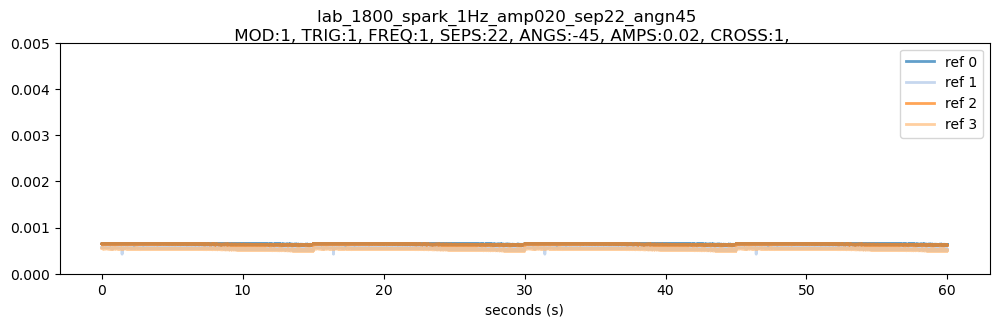

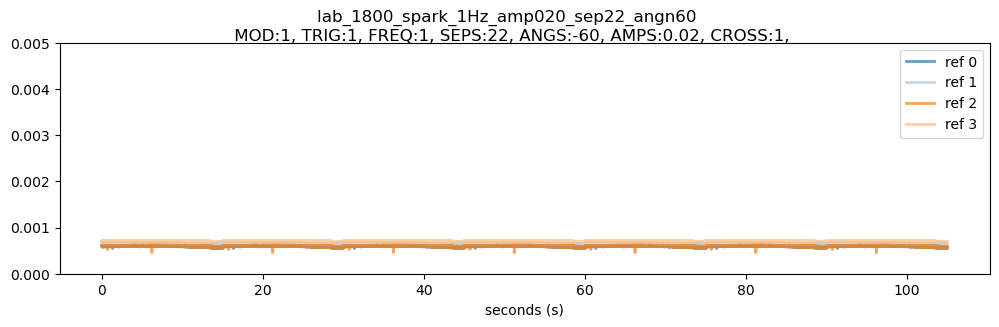

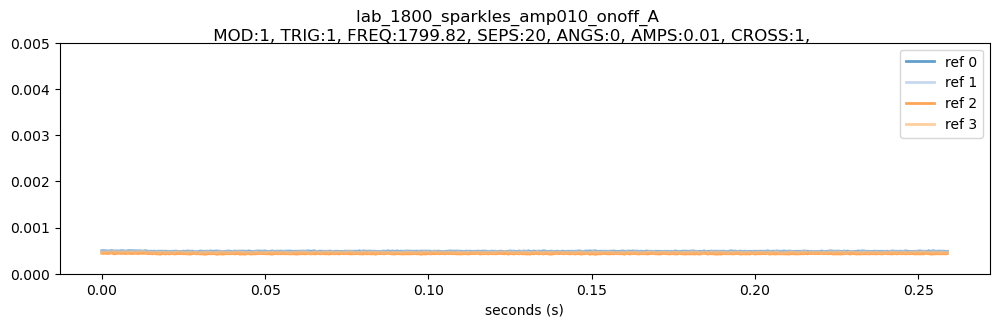

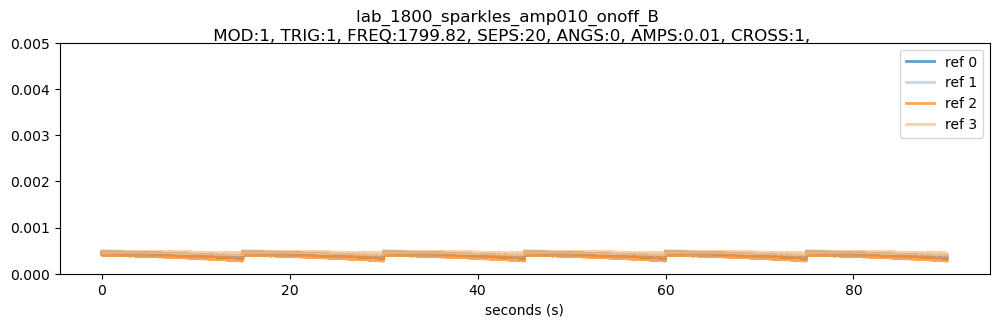

In [29]:
# checking single frame
colors = pl.cm.tab20(np.arange(4))
for lab_file in lab_list:
    lab_path = lab_dir + lab_file + "/camwfs/"

    # pull dot series
    lab_dotseries_f = lab_path.replace("camwfs/", "lab_splits_total_list.npy")
    dot_series = np.load(lab_dotseries_f)
    spark_params = spkl.get_spark_params(lab_path)
    spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])
    
    # set up plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,3), facecolor='white', sharex=True)
    fig.subplots_adjust(hspace=0)
    plt.suptitle(f"{lab_file} \n {spark_param_print}", y=0.99)

    #generating t axis 
    hz = spkl.get_Hzs(lab_path)
    frame_n = dot_series.shape[0]/4
    total_s = frame_n/hz
    x_axis = np.arange(0, total_s, total_s/frame_n)

    for e in range(4):
        axs.plot(x_axis, dot_series[e::4,e], lw=2, alpha = 0.7, label = f'ref {e}', c = colors[e])
        #axs.set_ylabel(f"sparkle split {e}")
        axs.set_ylim(bottom=0, top=0.005)

    plt.legend()
    plt.xlabel('seconds (s)')
    plt.savefig("plts/labseries_single/"+lab_file+"dotseries.png", dpi=200)
    plt.close()

/tmp/ipykernel_45595/2164661859.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)


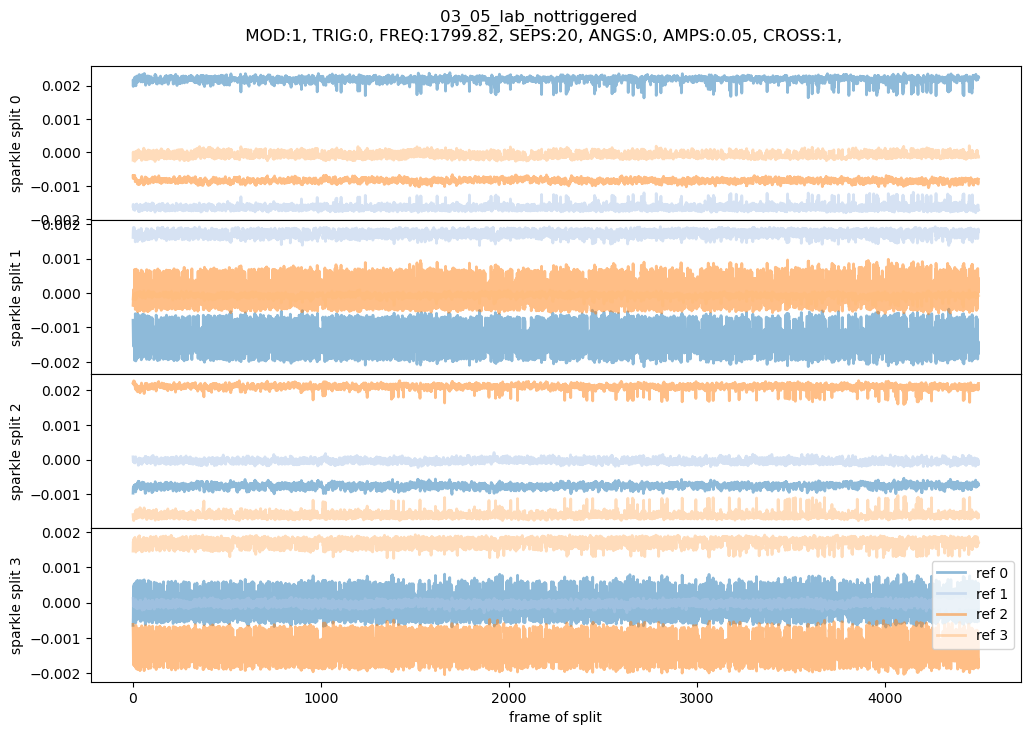

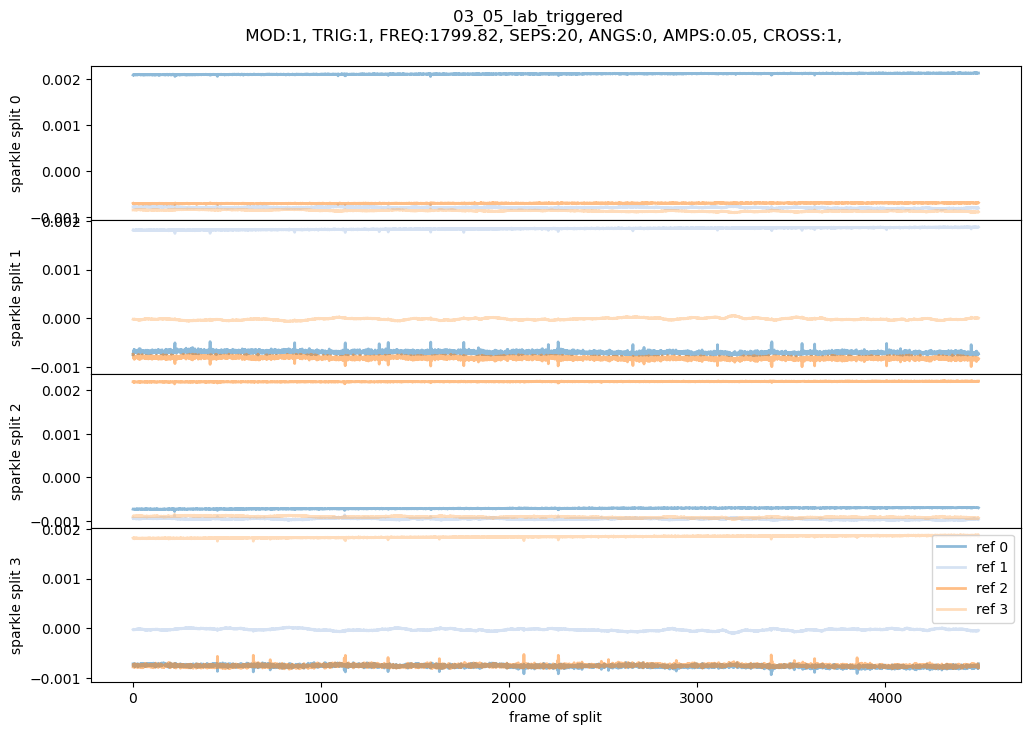

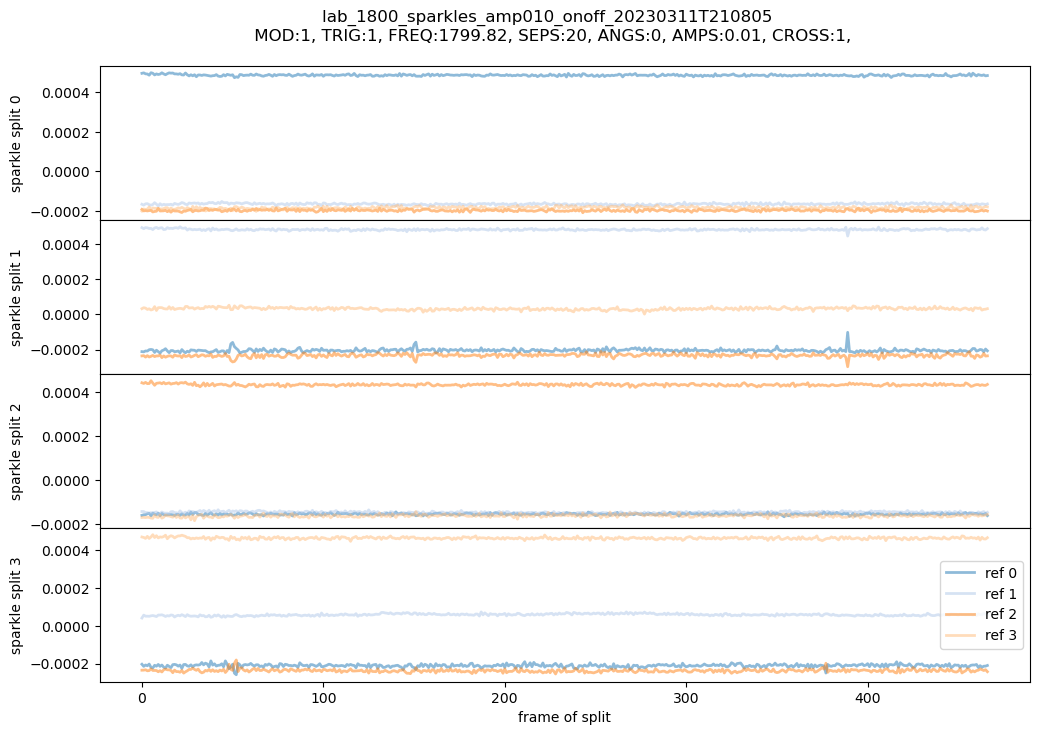

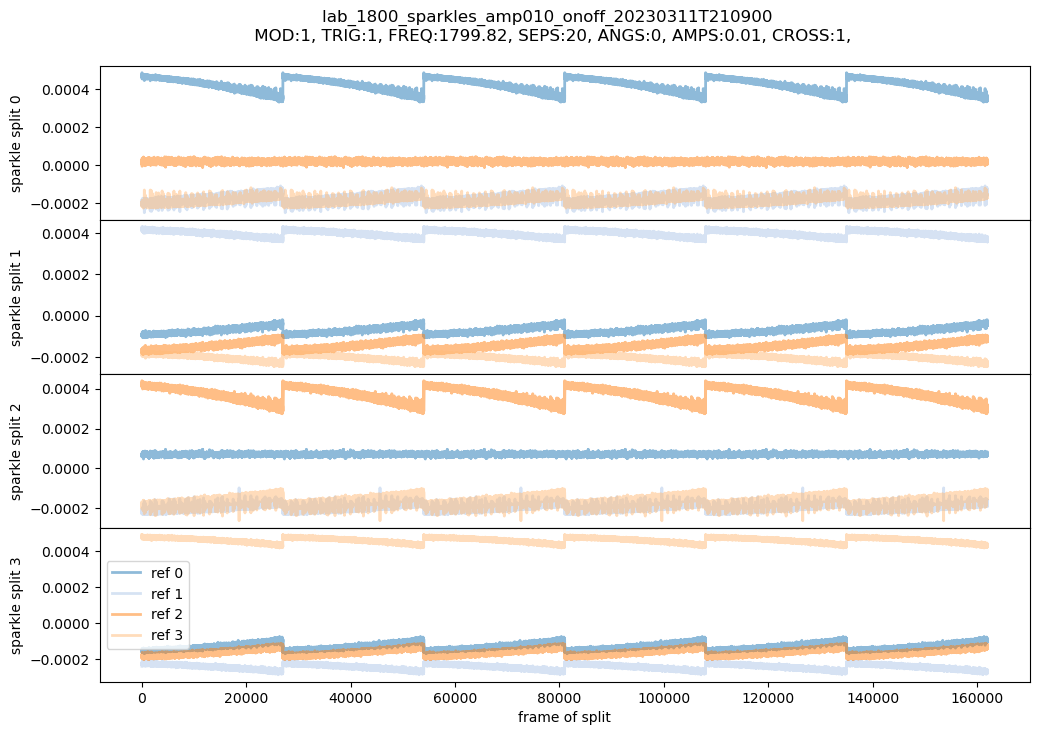

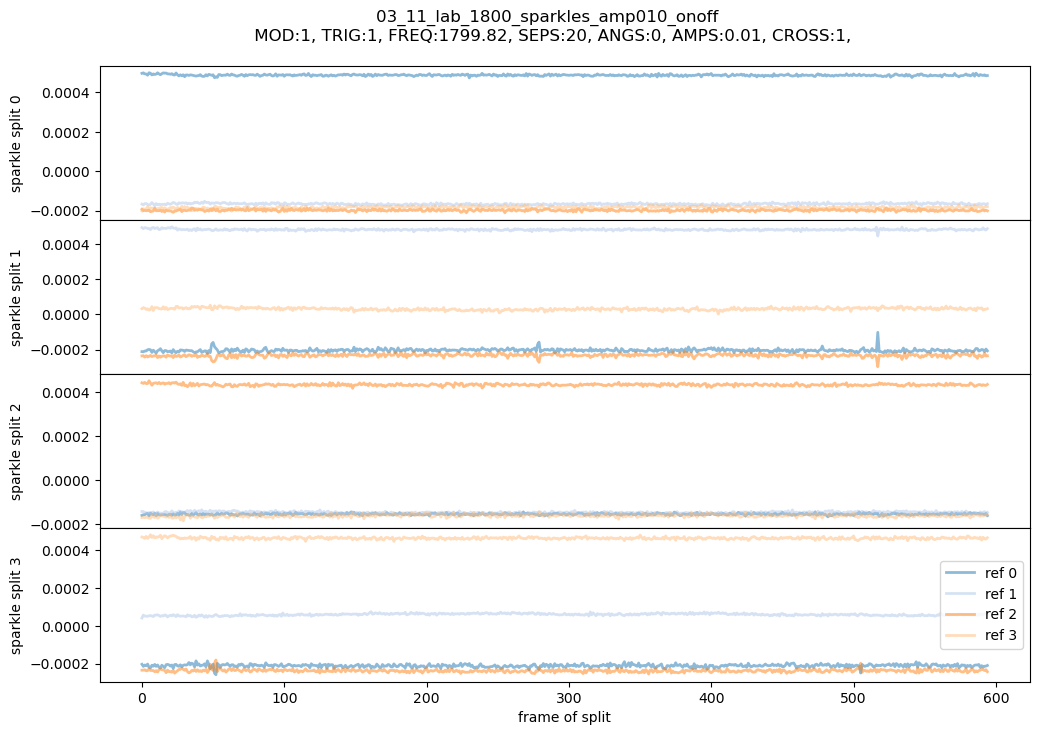

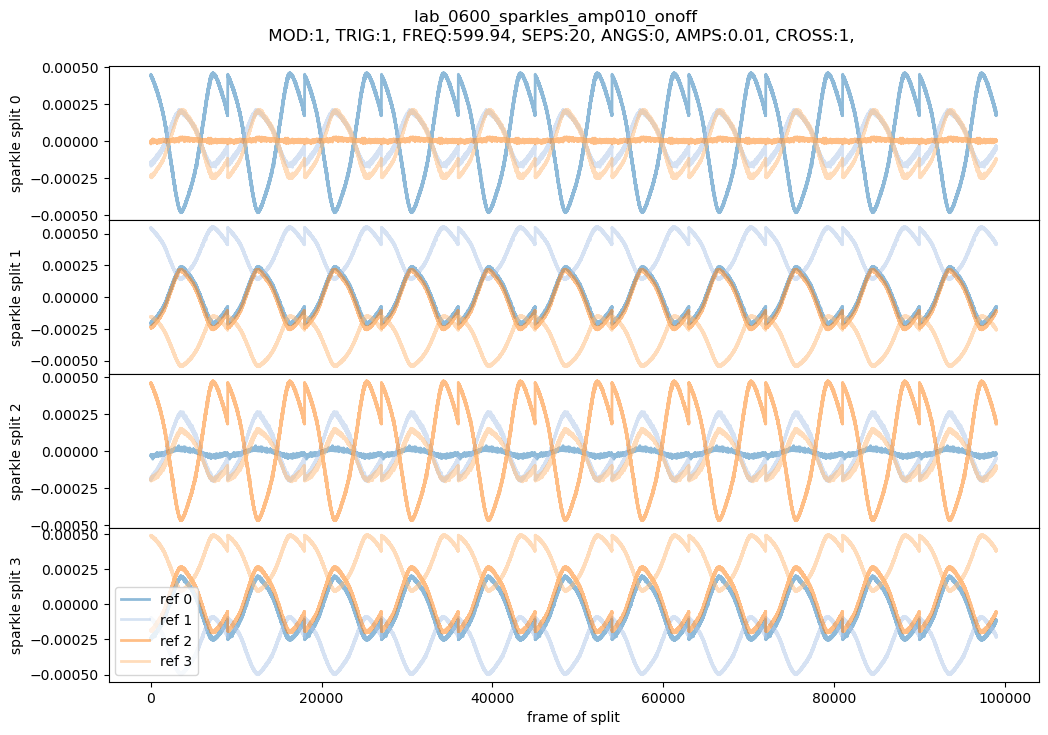

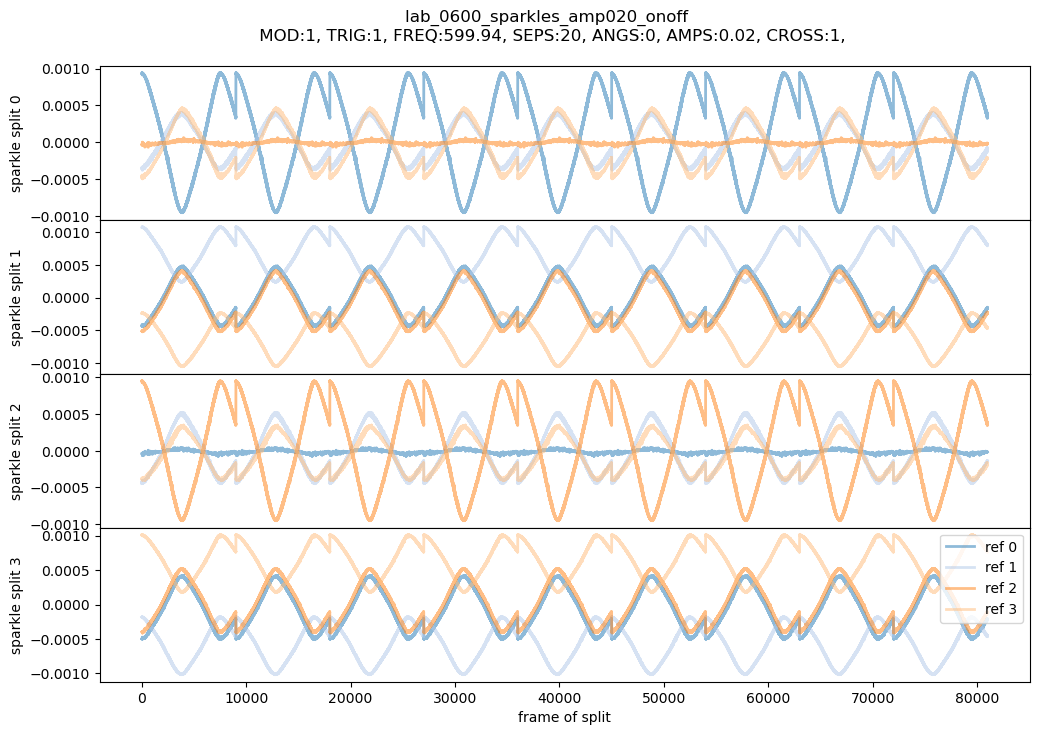

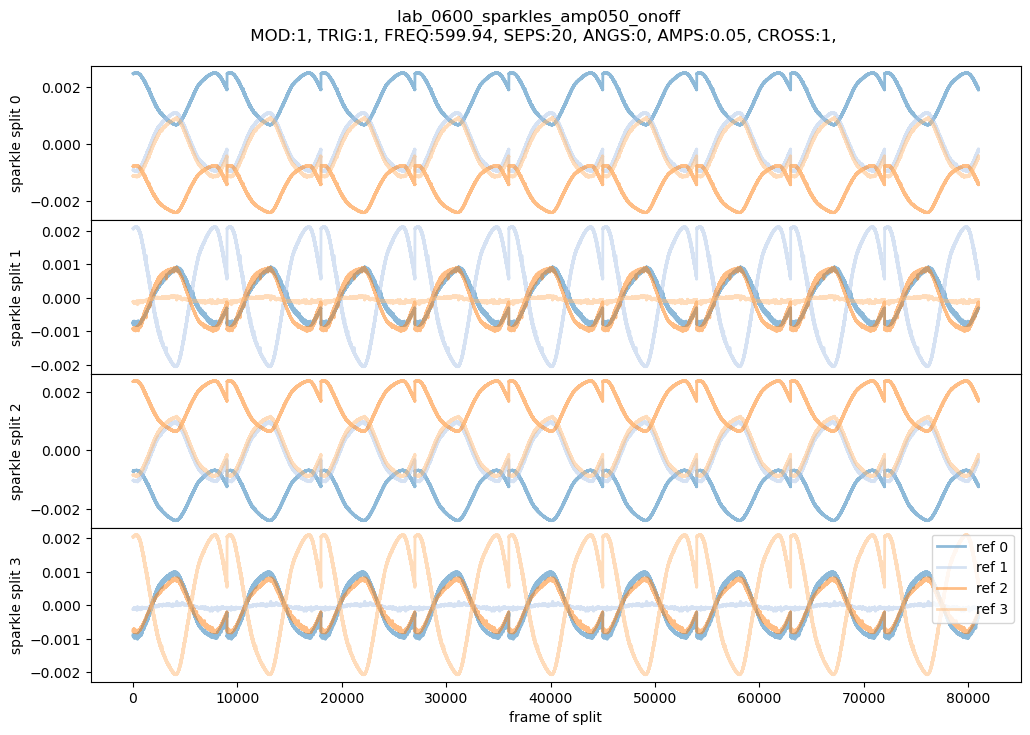

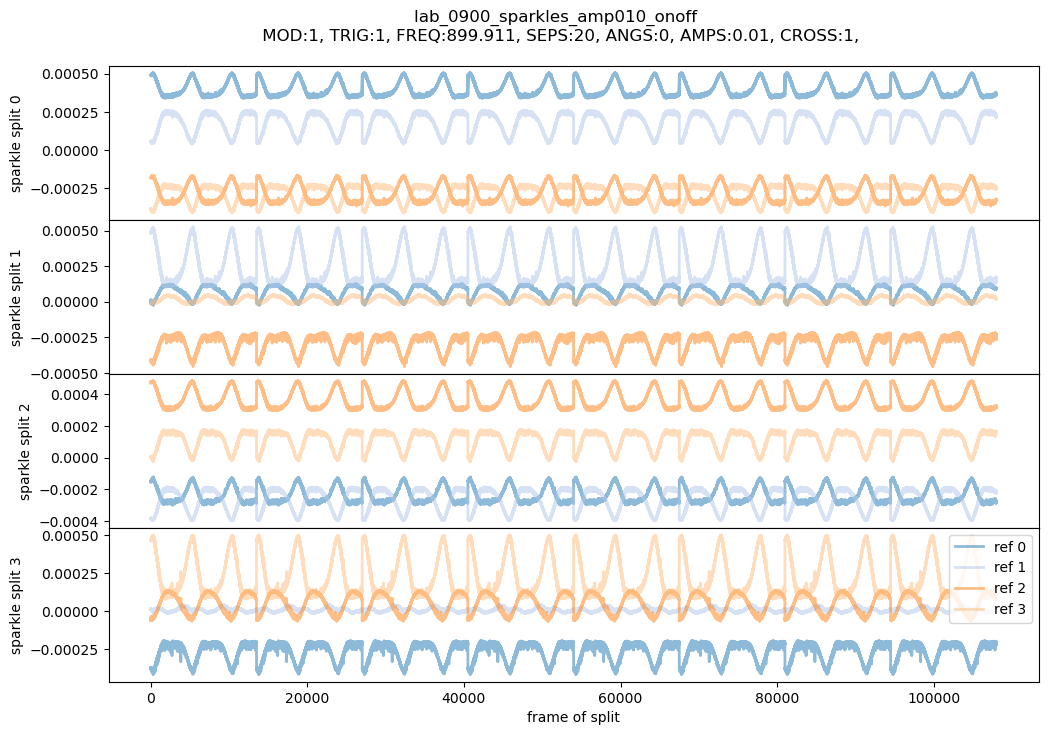

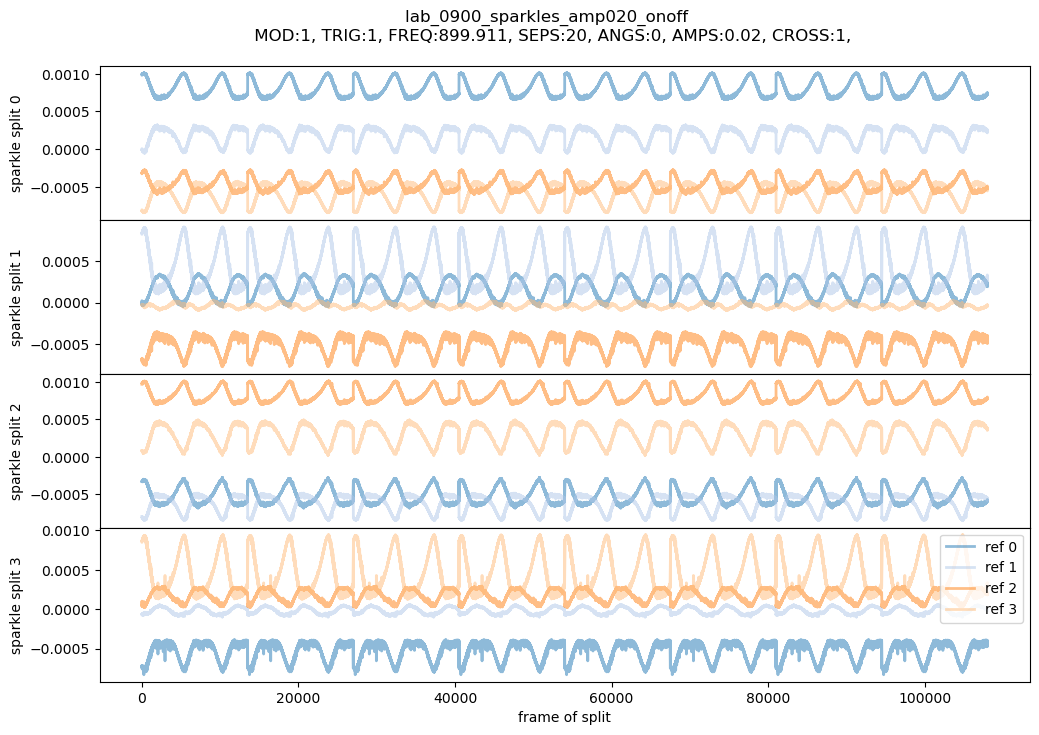

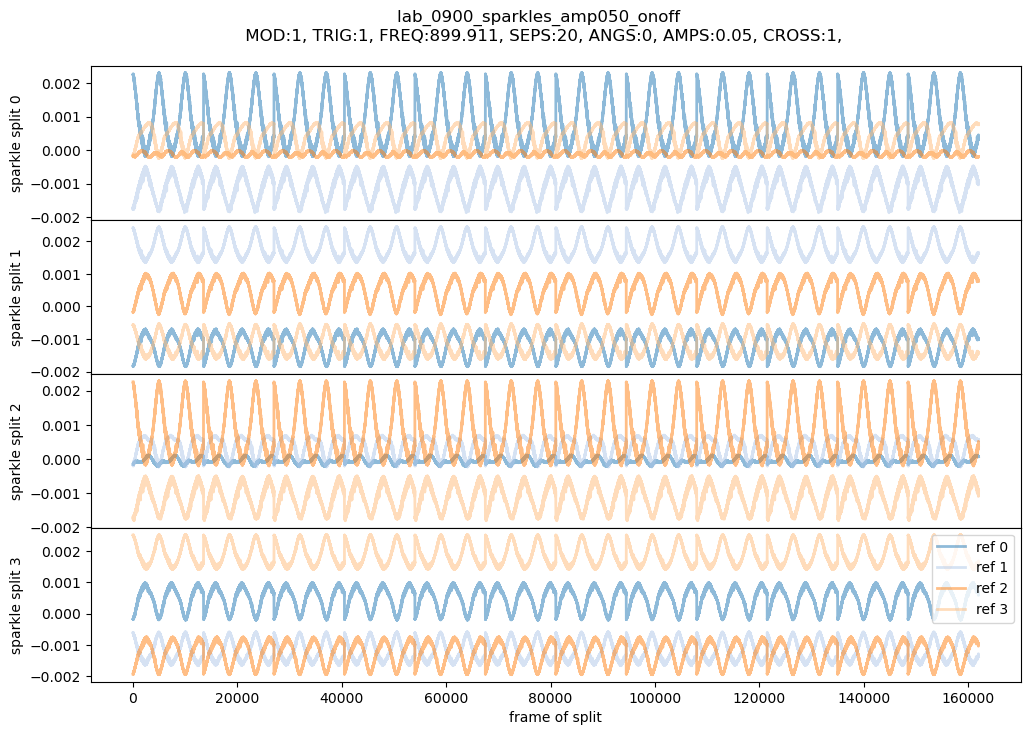

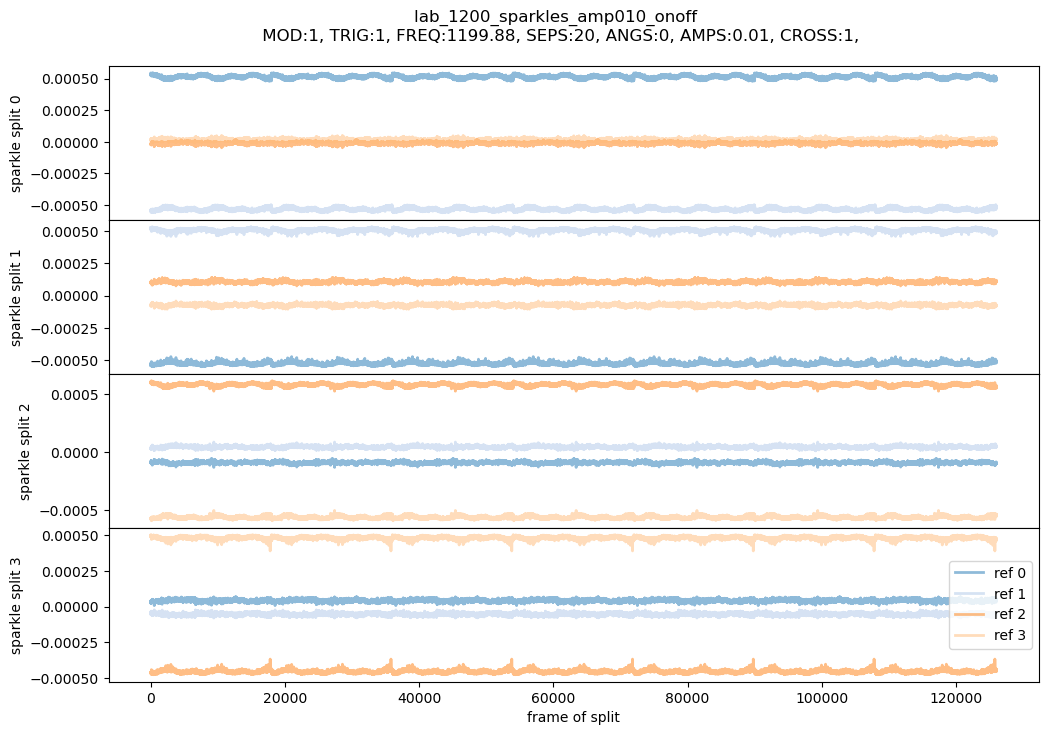

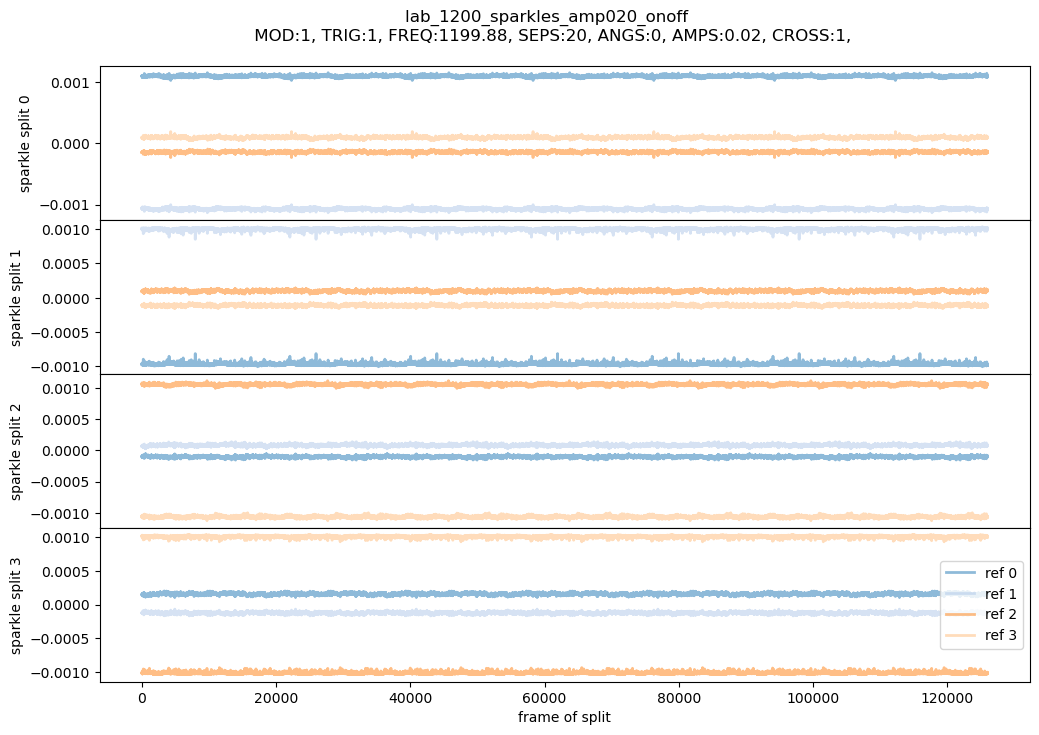

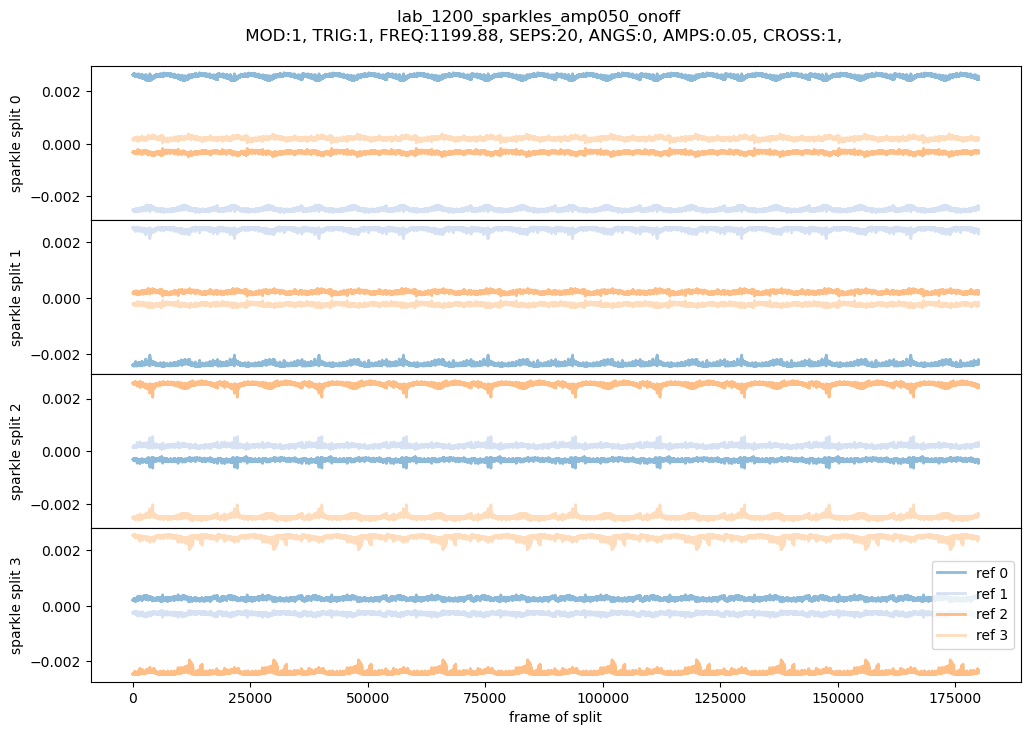

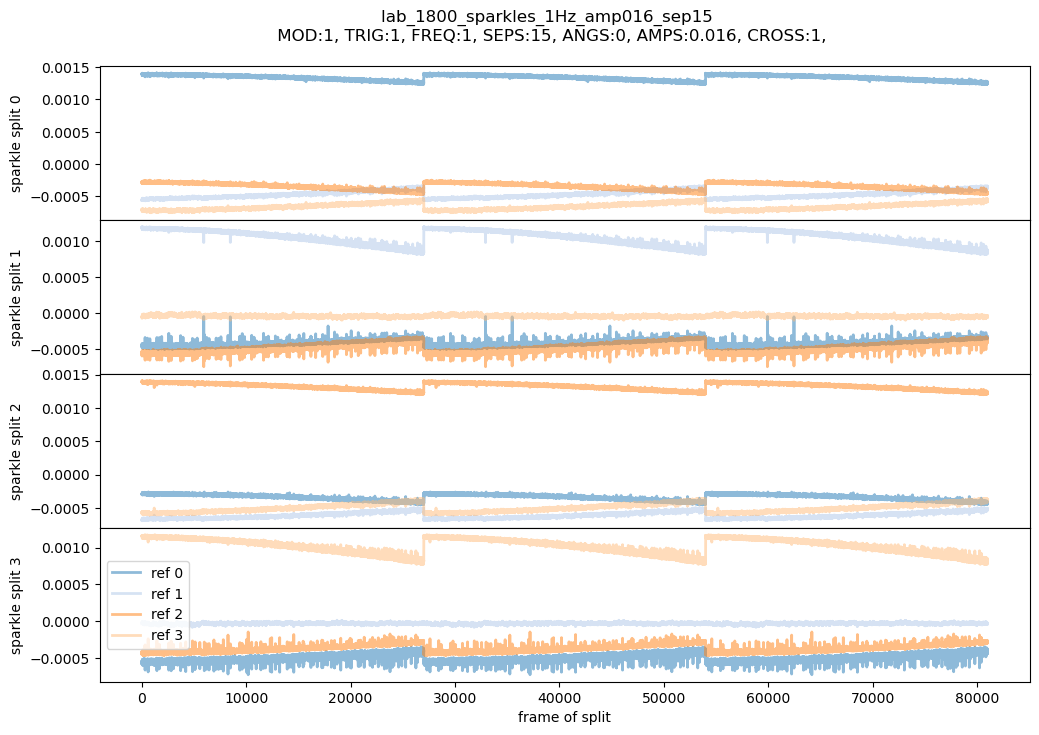

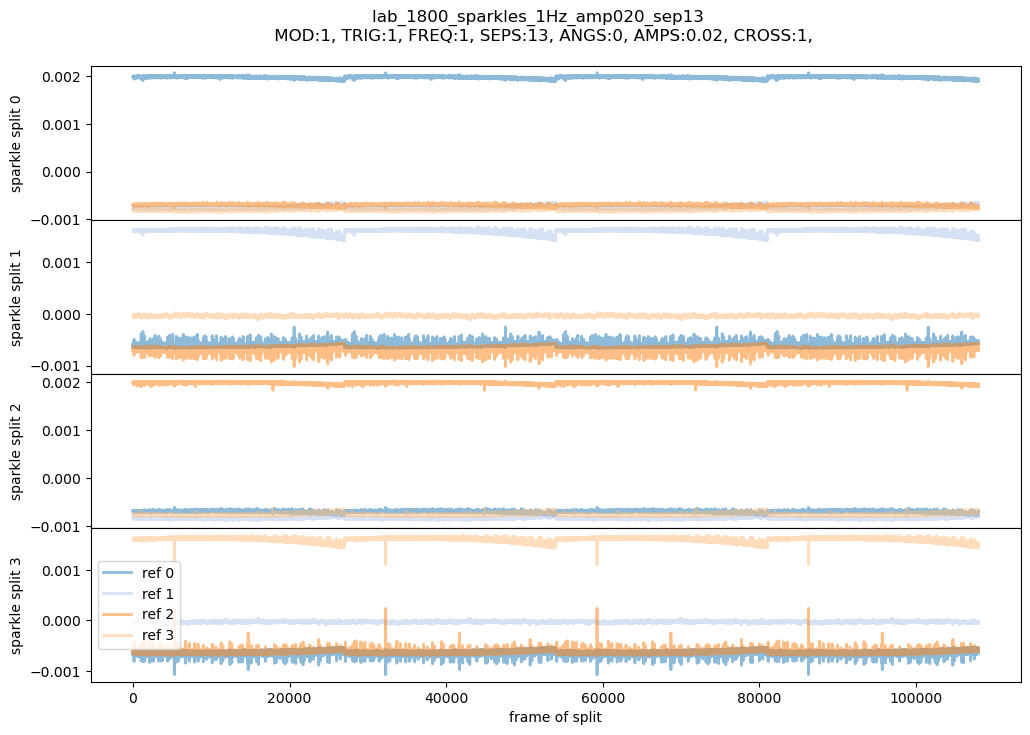

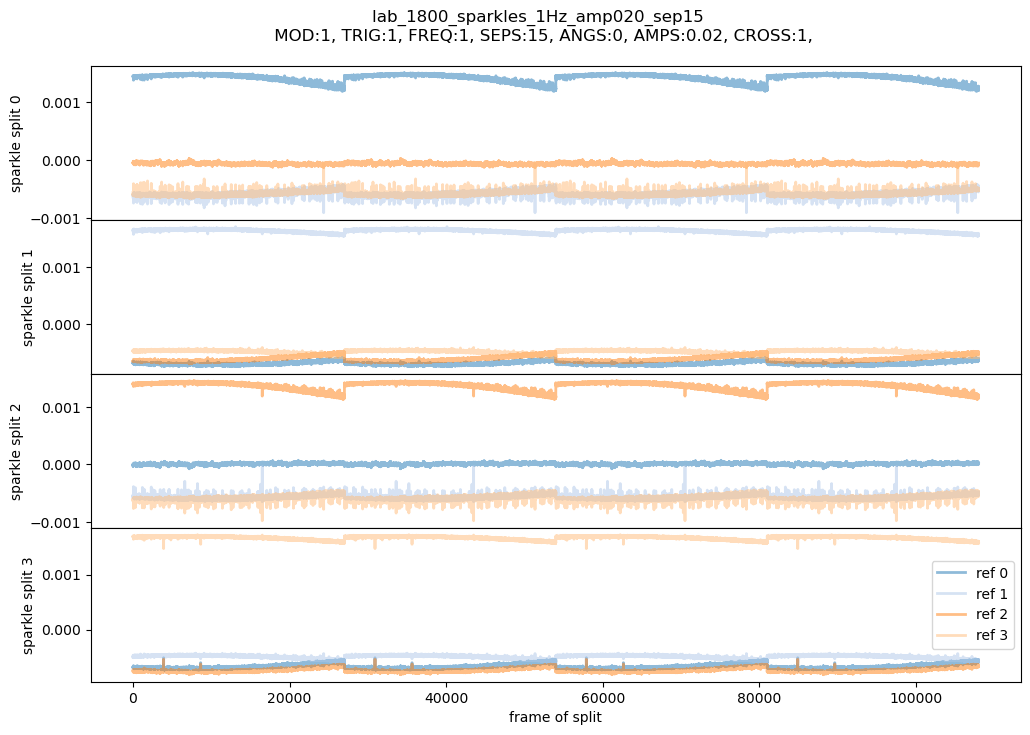

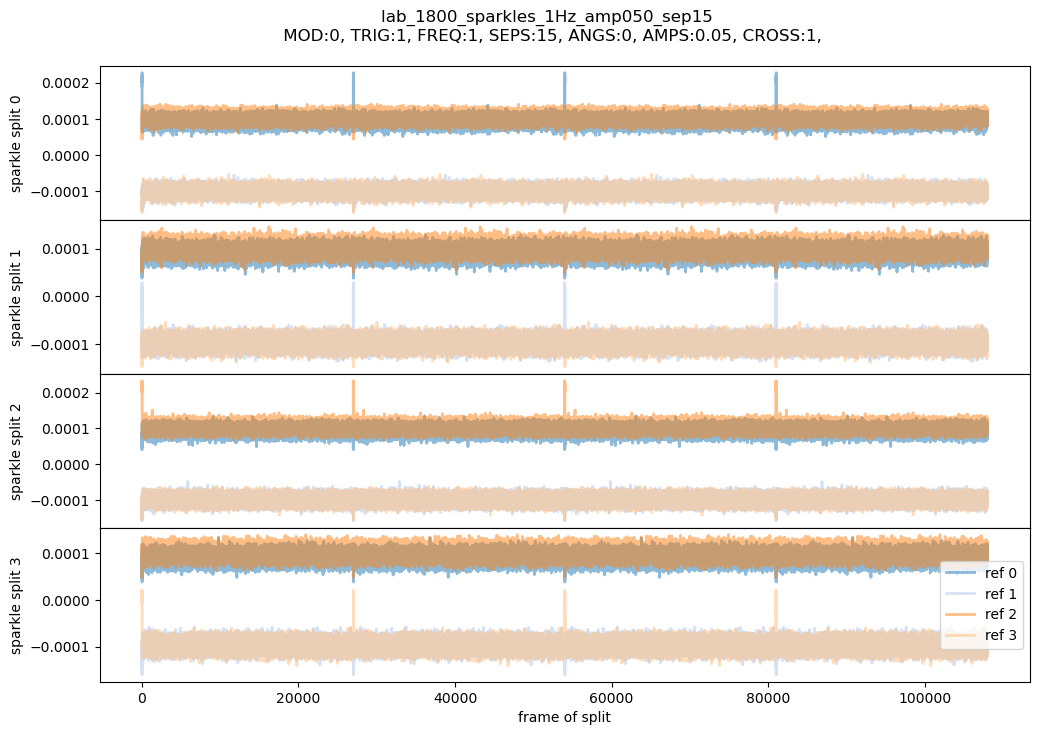

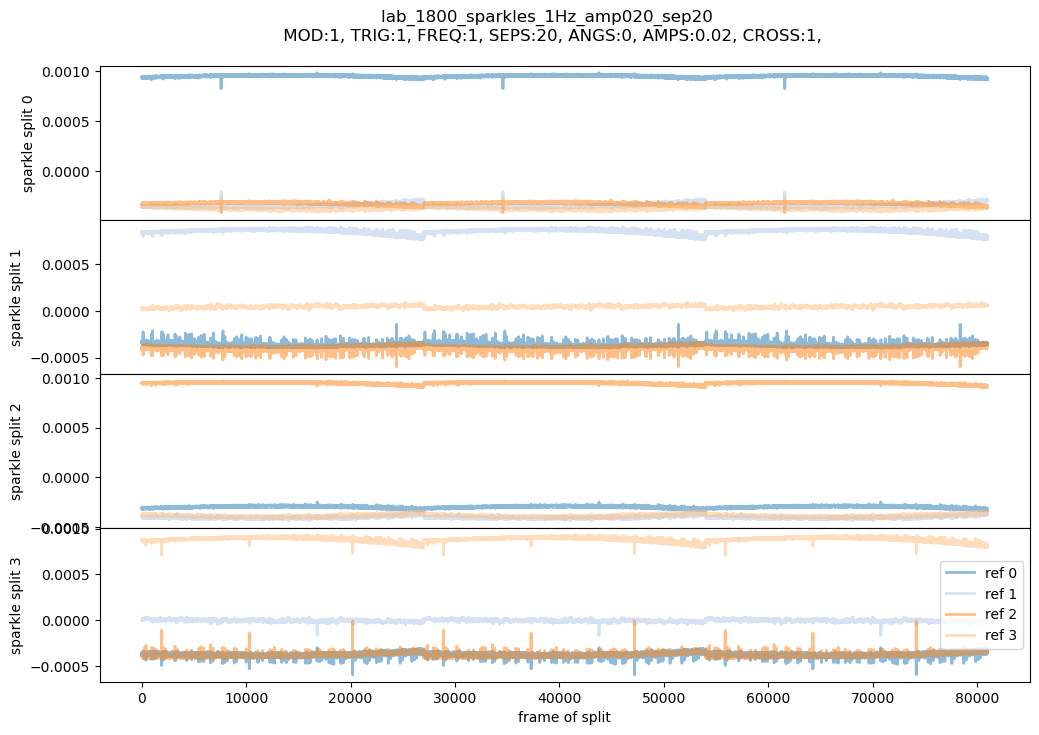

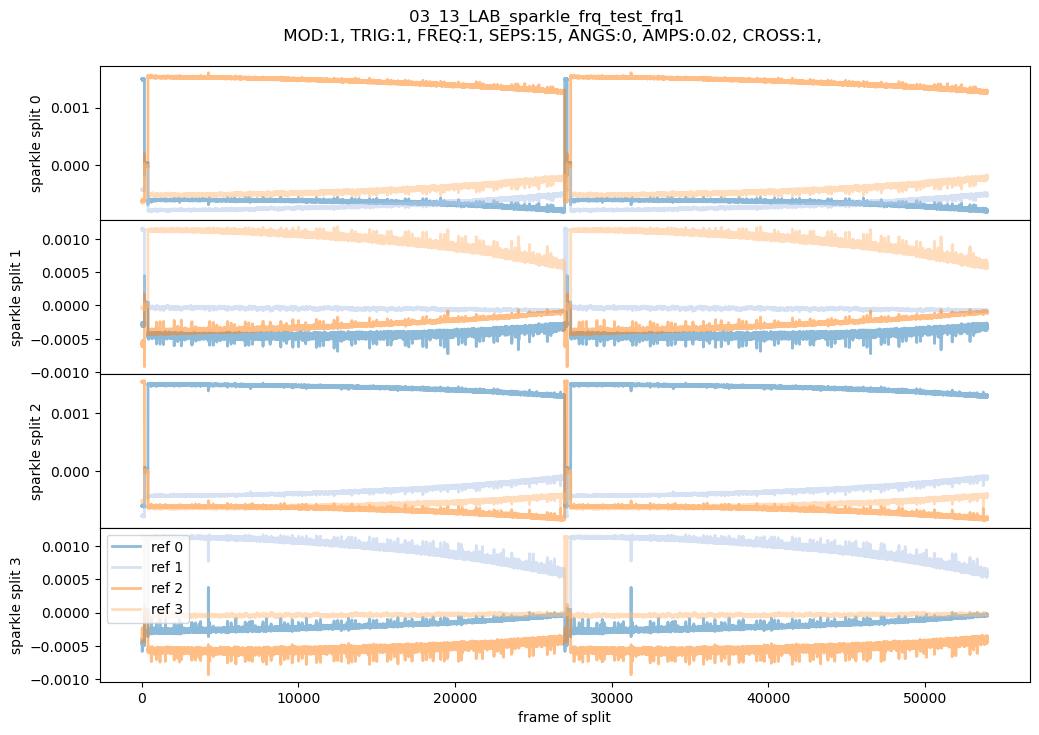

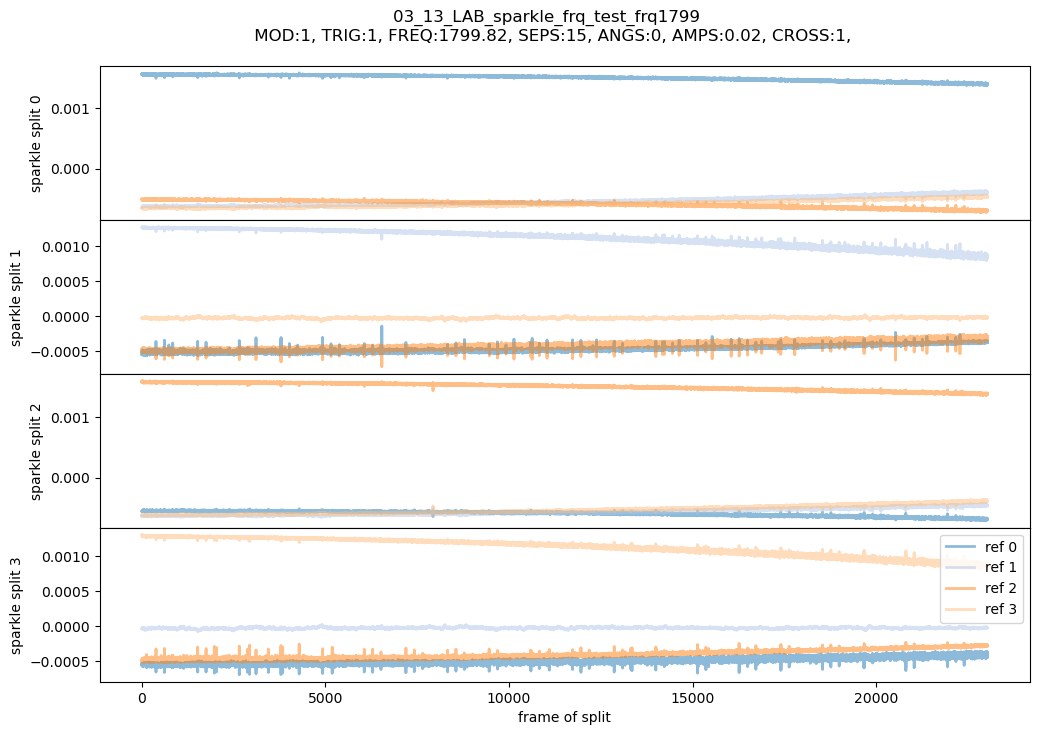

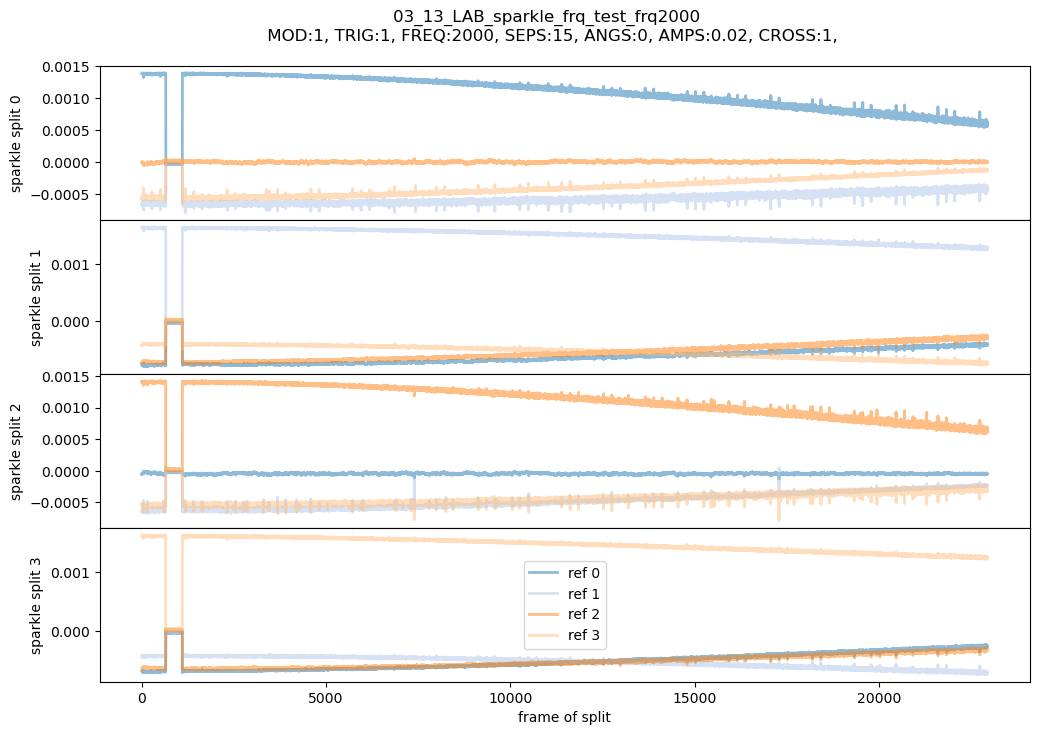

In [41]:
for lab_file in lab_list:
    lab_path = lab_dir + lab_file + "/camwfs/"

    # pull dot series
    lab_dotseries_f = lab_path.replace("camwfs/", "lab_splits_total_list.npy")
    dot_series = np.load(lab_dotseries_f)

    spark_params = spkl.get_spark_params(lab_path)
    spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])

    colors = pl.cm.tab20(np.arange(4))

    # Redid the ref code, now checking the series
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
    fig.subplots_adjust(hspace=0)
    plt.suptitle(f"{lab_file} \n {spark_param_print}", y=0.95)

    for e in range(4):
        for i in range(4):
            axs[e].plot(dot_series[e::4,i], lw=2, alpha = 0.5, label = f'ref {i}', c = colors[i])
        axs[e].set_ylabel(f"sparkle split {e}")
        #axs[e].set_ylim(top=.0002, bottom=-0.0002)

    plt.legend()
    plt.xlabel('frame of split')
    plt.savefig("plts/labseries/"+lab_file+"dotseries.png", dpi=200)


# Long Lab tests

5/22/2023 - looking at hour long chunks of lab time to see if they have the characteristic oscillation that we see in on-sky data streams

In [8]:
lab_long_1hz = "/home/eden/data/2023A/LONG_LAB/lab_1800_spark_1Hz_amp020_sep20/camwfs/"
spark_params = spkl.print_sparkle_params(spkl.get_spark_params(lab_long_1hz))
spark_params

MOD : 1   TRIG : 1   FREQ : 1   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  


In [10]:
reload(spkl)
sp_lab_long1hz= spkl.Spark(lab_long_1hz, lab_long_1hz, spkl.glob_dir_calib, spkl.glob_dark, spkl.glob_ref, spkl.glob_dark) #skipping bc FREQ

HZ value: 1800
HZ value: 1800
Number of DATA files:  2616567
Number of REF files:  2616567
MOD : 1   TRIG : 1   FREQ : 1   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 1   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  
GENERATING REFERENCE
=> Sampling 100 files, starting at 0


In [4]:
# Pulling saved dot product
avg_dot_file_long1hz = lab_long_1hz.replace('camwfs/', "data_chunks_list.npy")
avg_dot_long1hz = np.vstack(np.load(avg_dot_file_long1hz))

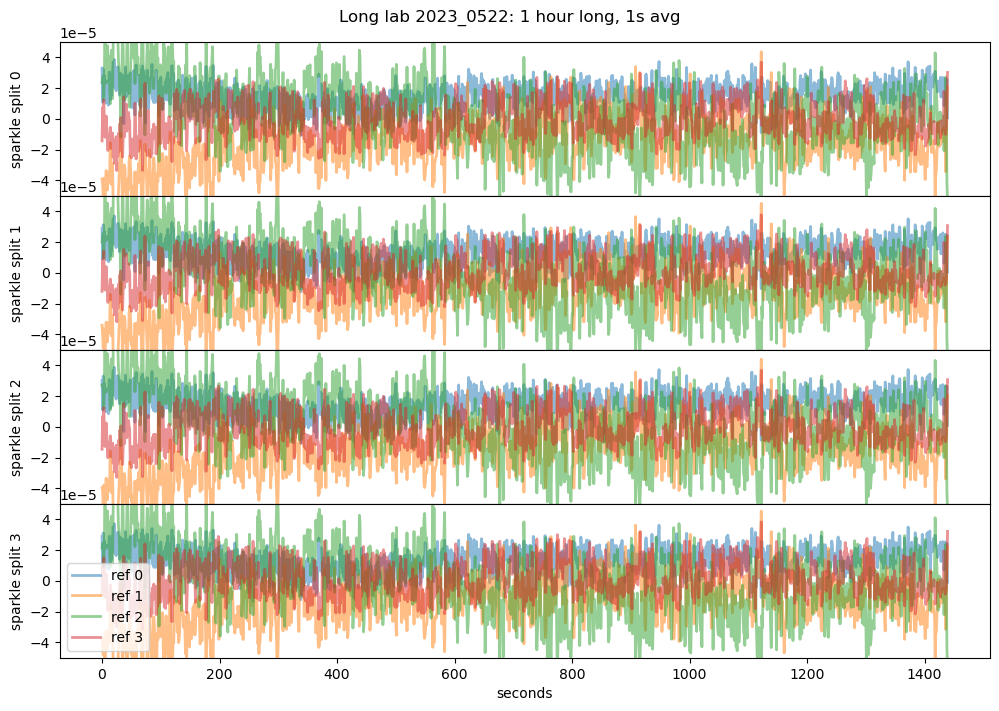

In [6]:
# plotting dot product series
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)
plt.suptitle(f"Long lab 2023_0522: 1 hour long, 1s avg", y=0.92)

for e in range(4):
    for i in range(4):
        axs[e].plot(avg_dot_long1hz[:,e,i], lw=2, alpha = 0.5, label = f'ref {i}')
    axs[e].set_ylabel(f"sparkle split {e}")
    axs[e].set_ylim(top=.00005, bottom=-0.00005)

plt.legend()
plt.xlabel('seconds')
plt.show()

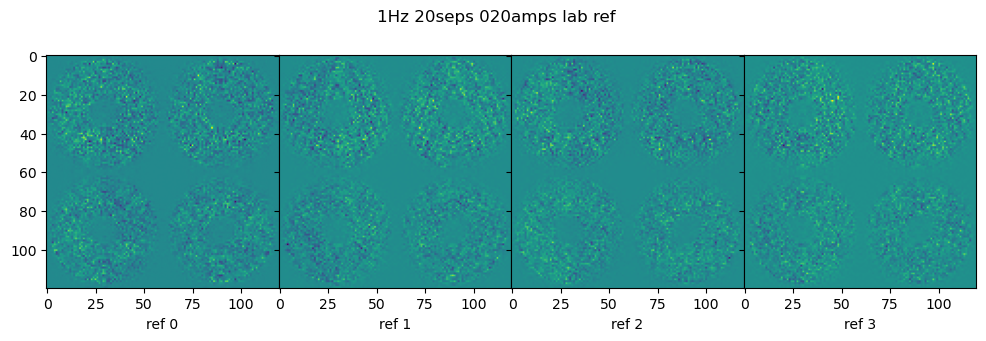

In [12]:

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"1Hz 20seps 020amps lab ref", y=0.90)

for e in range(4):
    axs[e].imshow(sp_lab_long1hz.labref[e], label = f'ref {e}')
    axs[e].set_xlabel(f"ref {e}")

plt.show()

In [3]:
files_tmp = spkl.file_lister(lab_long_1hz)
fits.open(lab_long_1hz+files_tmp[0])[0].header

NameError: name 'lab_long_1hz' is not defined

In [9]:
# the lab method of processing:
lab_dotseries_f = lab_long_1hz.replace("camwfs/", "lab_splits_total_list.npy")
dot_series = np.load(lab_dotseries_f)
dot_series.shape

(2700000, 4)

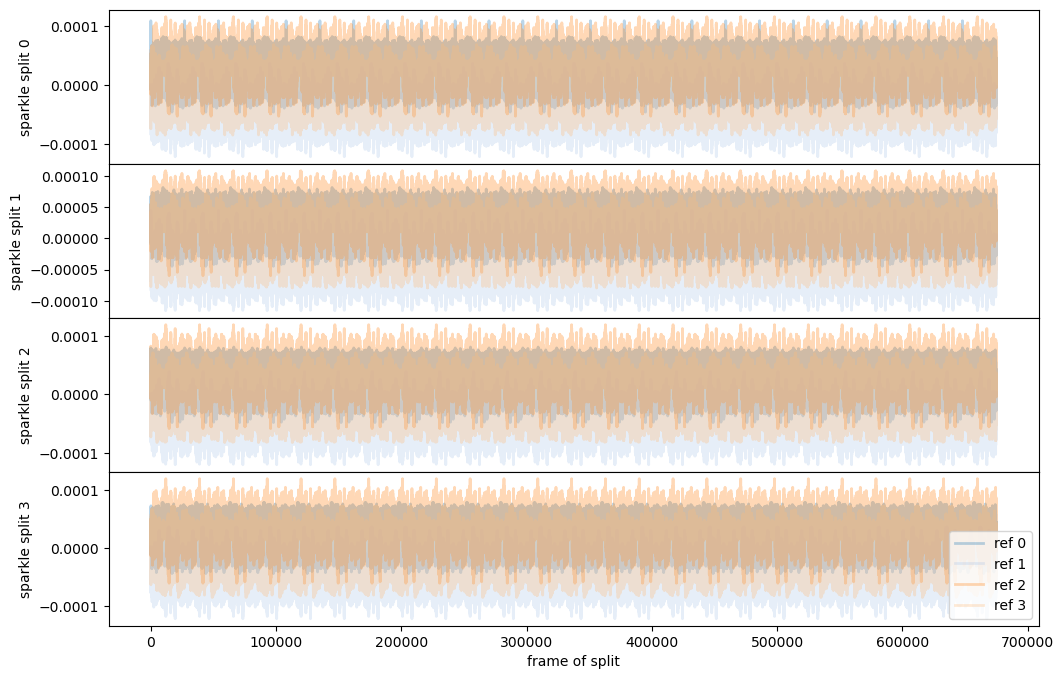

In [11]:
# Redid the ref code, now checking the series
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)

#spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])
#plt.suptitle(f"Labref Test \n {spark_param_print}", y=0.95)

colors = pl.cm.tab20(np.arange(4))

for e in range(4):
    for i in range(4):
        
        axs[e].plot(dot_series[e::4,i], lw=2, alpha = 0.3, label = f'ref {i}', c = colors[i])
    axs[e].set_ylabel(f"sparkle split {e}")
    #axs[e].set_ylim(top=.0002, bottom=-0.0002)

plt.legend()
plt.xlabel('frame of split')
plt.show()

In [16]:
# short lab test:

lab_short_test = "/home/eden/data/2023A/LONG_LAB/test_long_1799/camwfs/"
spark_params = spkl.print_sparkle_params(spkl.get_spark_params(lab_short_test))
spark_params

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  


In [17]:
lab_dotseries_f = lab_short_test.replace("camwfs/", "lab_splits_total_list.npy")
dot_series = np.load(lab_dotseries_f)
dot_series.shape

(216000, 4)

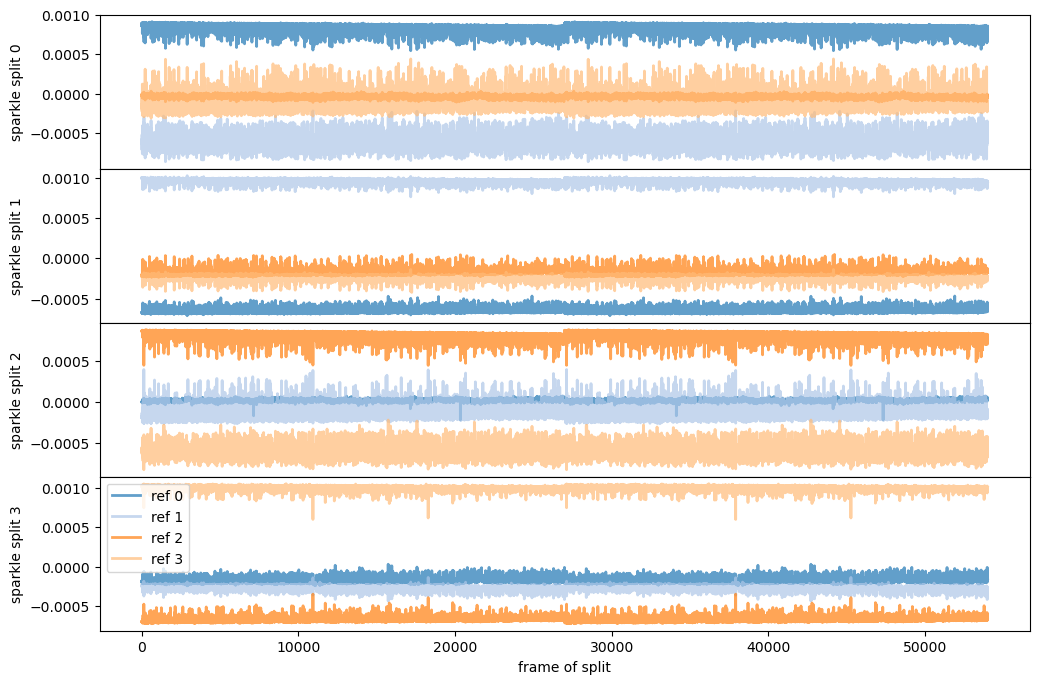

In [18]:
# Redid the ref code, now checking the series
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)

#spark_param_print = " ".join([key + ':'+ str(spark_params[key]) + "," for key in spark_params])
#plt.suptitle(f"Labref Test \n {spark_param_print}", y=0.95)

colors = pl.cm.tab20(np.arange(4))

for e in range(4):
    for i in range(4):
        
        axs[e].plot(dot_series[e::4,i], lw=2, alpha = 0.7, label = f'ref {i}', c = colors[i])
    axs[e].set_ylabel(f"sparkle split {e}")
    #axs[e].set_ylim(top=.0002, bottom=-0.0002)

plt.legend()
plt.xlabel('frame of split')
plt.show()